# 서울시 따릉이 대여량 예측

### 1. 출처 : [(서울시 따릉이 데이터) 언제 얼만큼 탈까](https://dacon.io/competitions/open/235576/overview/)


### 2. 목표 : 2017년 4월 1일부터, 5월 31일까지 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수 예측


### 3. Column 설명

- id : 날짜와 시간별 id
- datetime : 날짜와 시간(날짜_시간)
- temperature : 기온
- precipitation : 강수
- windspeed : 풍속(평균)
- humidity : 습도
- visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone : 오존
- pm10 : 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 : 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count : 해당 날짜, 시간에 따릉이 대여 수

---

# Library Loads

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=1.5)
sns.set(style = "whitegrid")

from IPython.display import set_matplotlib_formats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
# plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["figure.figsize"] = (16, 6)

# 별도로, 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

---

# Data Loads

In [4]:
train = pd.read_csv("data/train.csv")

print(train.shape)
train.head()

(1459, 11)


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [5]:
test = pd.read_csv("data/test.csv")

print(test.shape)
test.head()

(715, 10)


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


---

# Data Checks

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
id                        1459 non-null int64
hour                      1459 non-null int64
hour_bef_temperature      1457 non-null float64
hour_bef_precipitation    1457 non-null float64
hour_bef_windspeed        1450 non-null float64
hour_bef_humidity         1457 non-null float64
hour_bef_visibility       1457 non-null float64
hour_bef_ozone            1383 non-null float64
hour_bef_pm10             1369 non-null float64
hour_bef_pm2.5            1342 non-null float64
count                     1459 non-null float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
id                        715 non-null int64
hour                      715 non-null int64
hour_bef_temperature      714 non-null float64
hour_bef_precipitation    714 non-null float64
hour_bef_windspeed        714 non-null float64
hour_bef_humidity         714 non-null float64
hour_bef_visibility       714 non-null float64
hour_bef_ozone            680 non-null float64
hour_bef_pm10             678 non-null float64
hour_bef_pm2.5            679 non-null float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


train, test 데이터 전부 정수 또는 실수형 데이터로 이루어져 있습니다.

## 결측치 확인

In [8]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

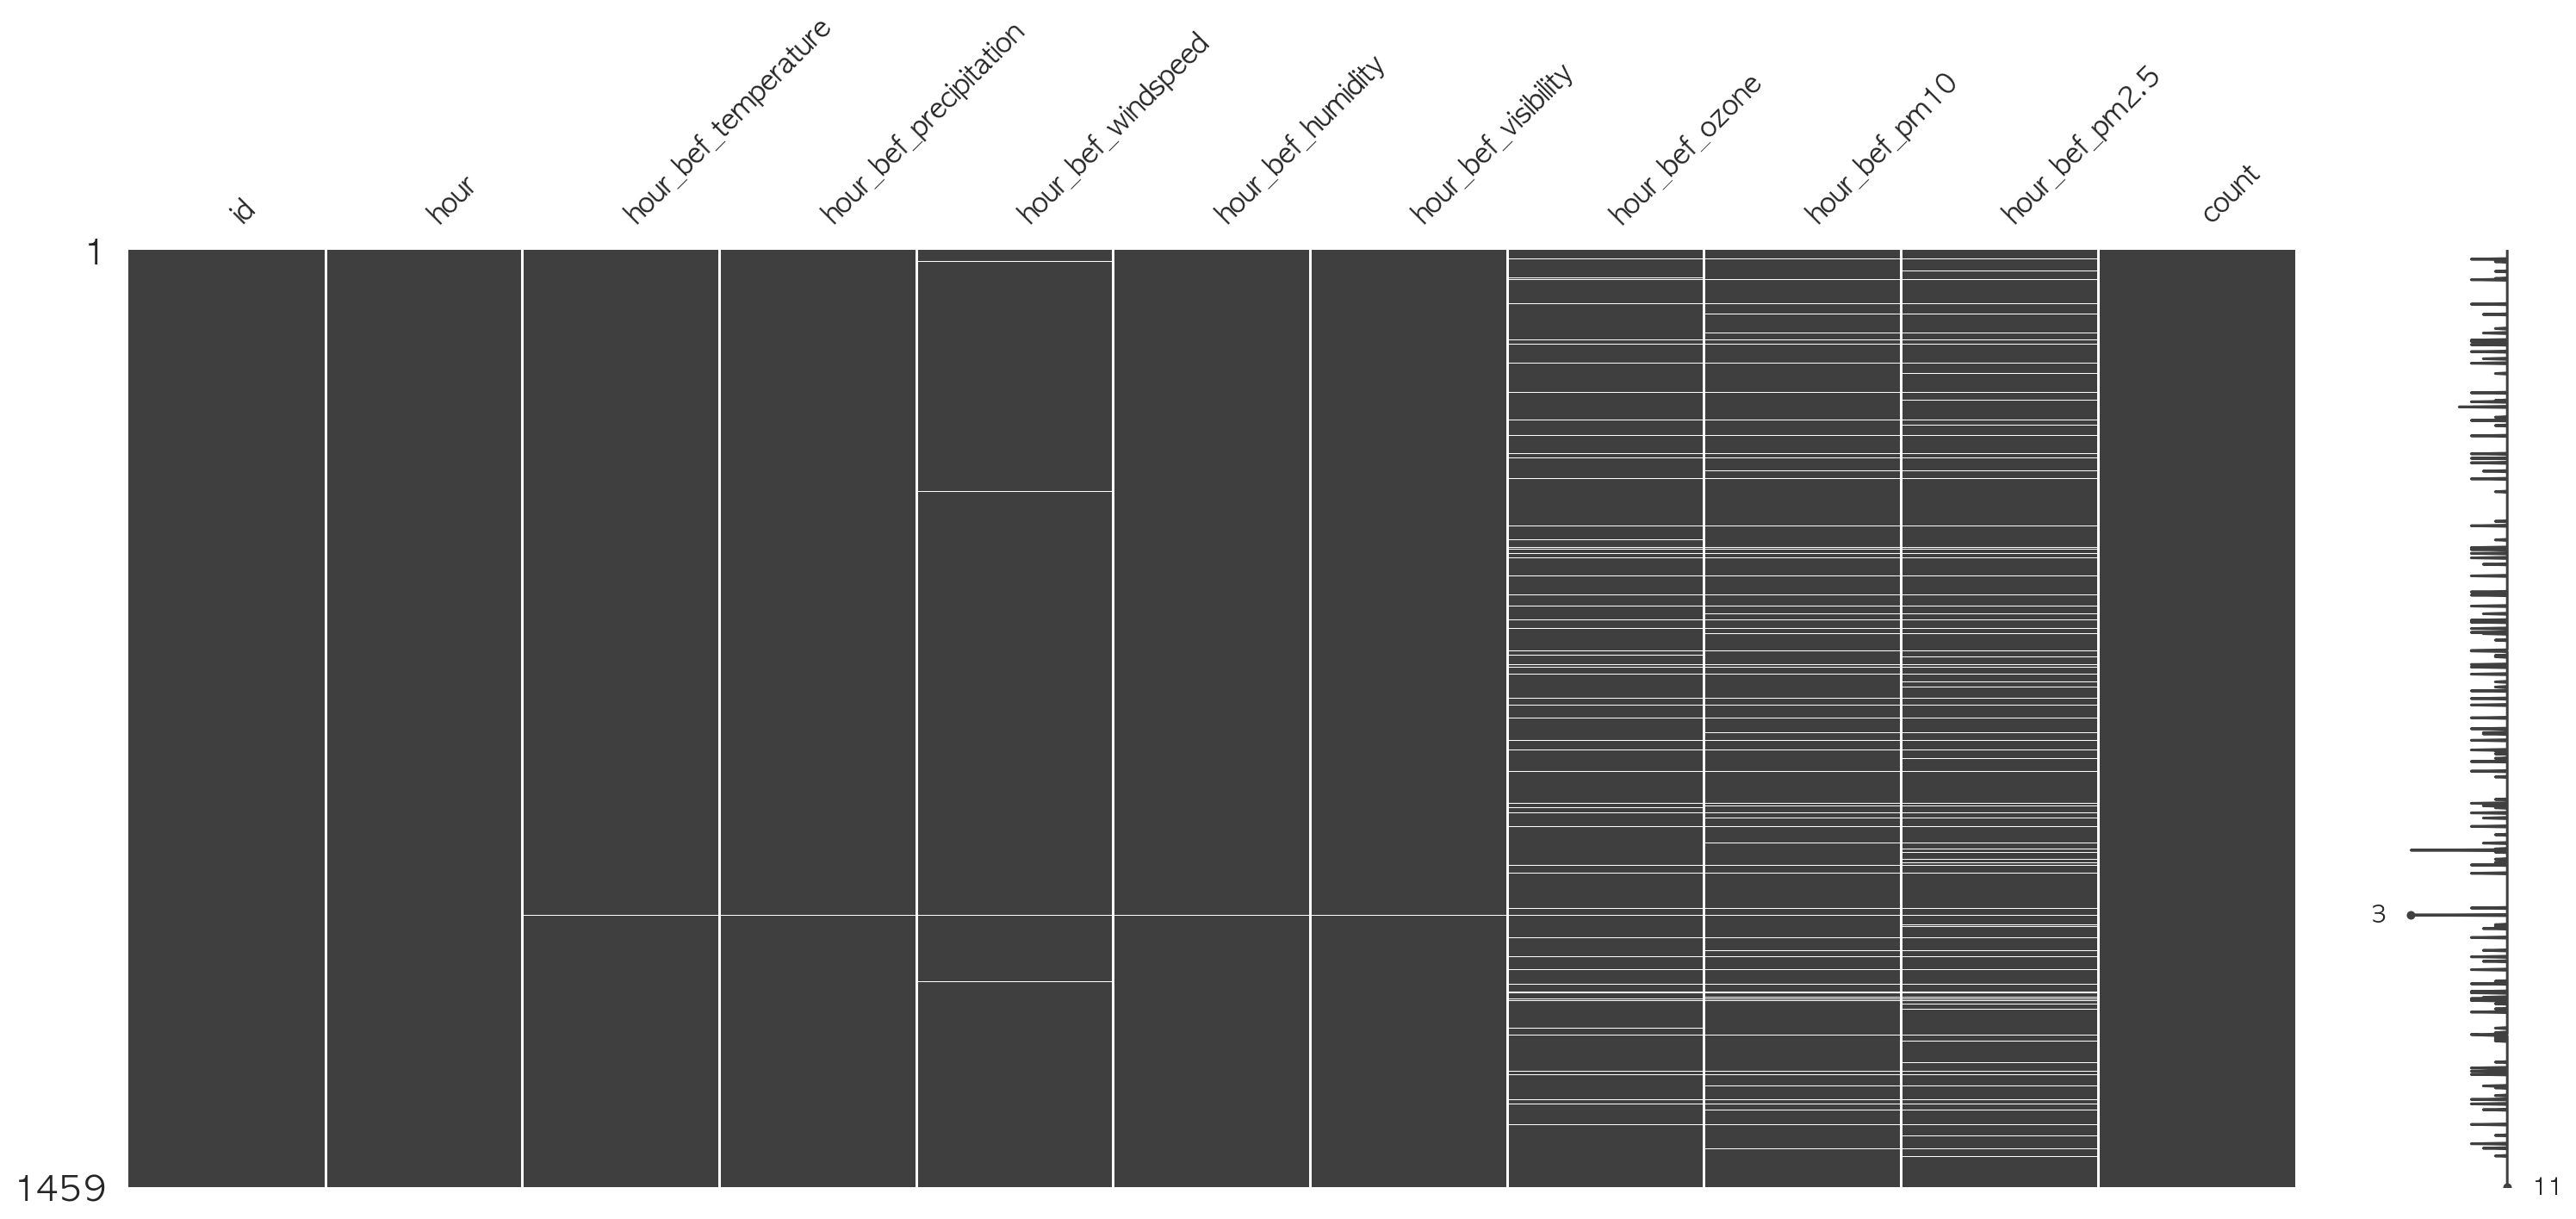

In [9]:
import missingno as msno

msno.matrix(train)

결측치는 각 컬럼의 중간값으로 대체하도록 하겠습니다.

In [10]:
nan_columns = ["hour_bef_temperature", "hour_bef_precipitation", "hour_bef_windspeed", "hour_bef_humidity",
              "hour_bef_visibility", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5"]

for i in nan_columns :
    train[i] = train[i].fillna(train[i].median())

In [11]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

해당 컬럼의 결측치가 없는 것을 확인 할 수 있습니다.

In [12]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

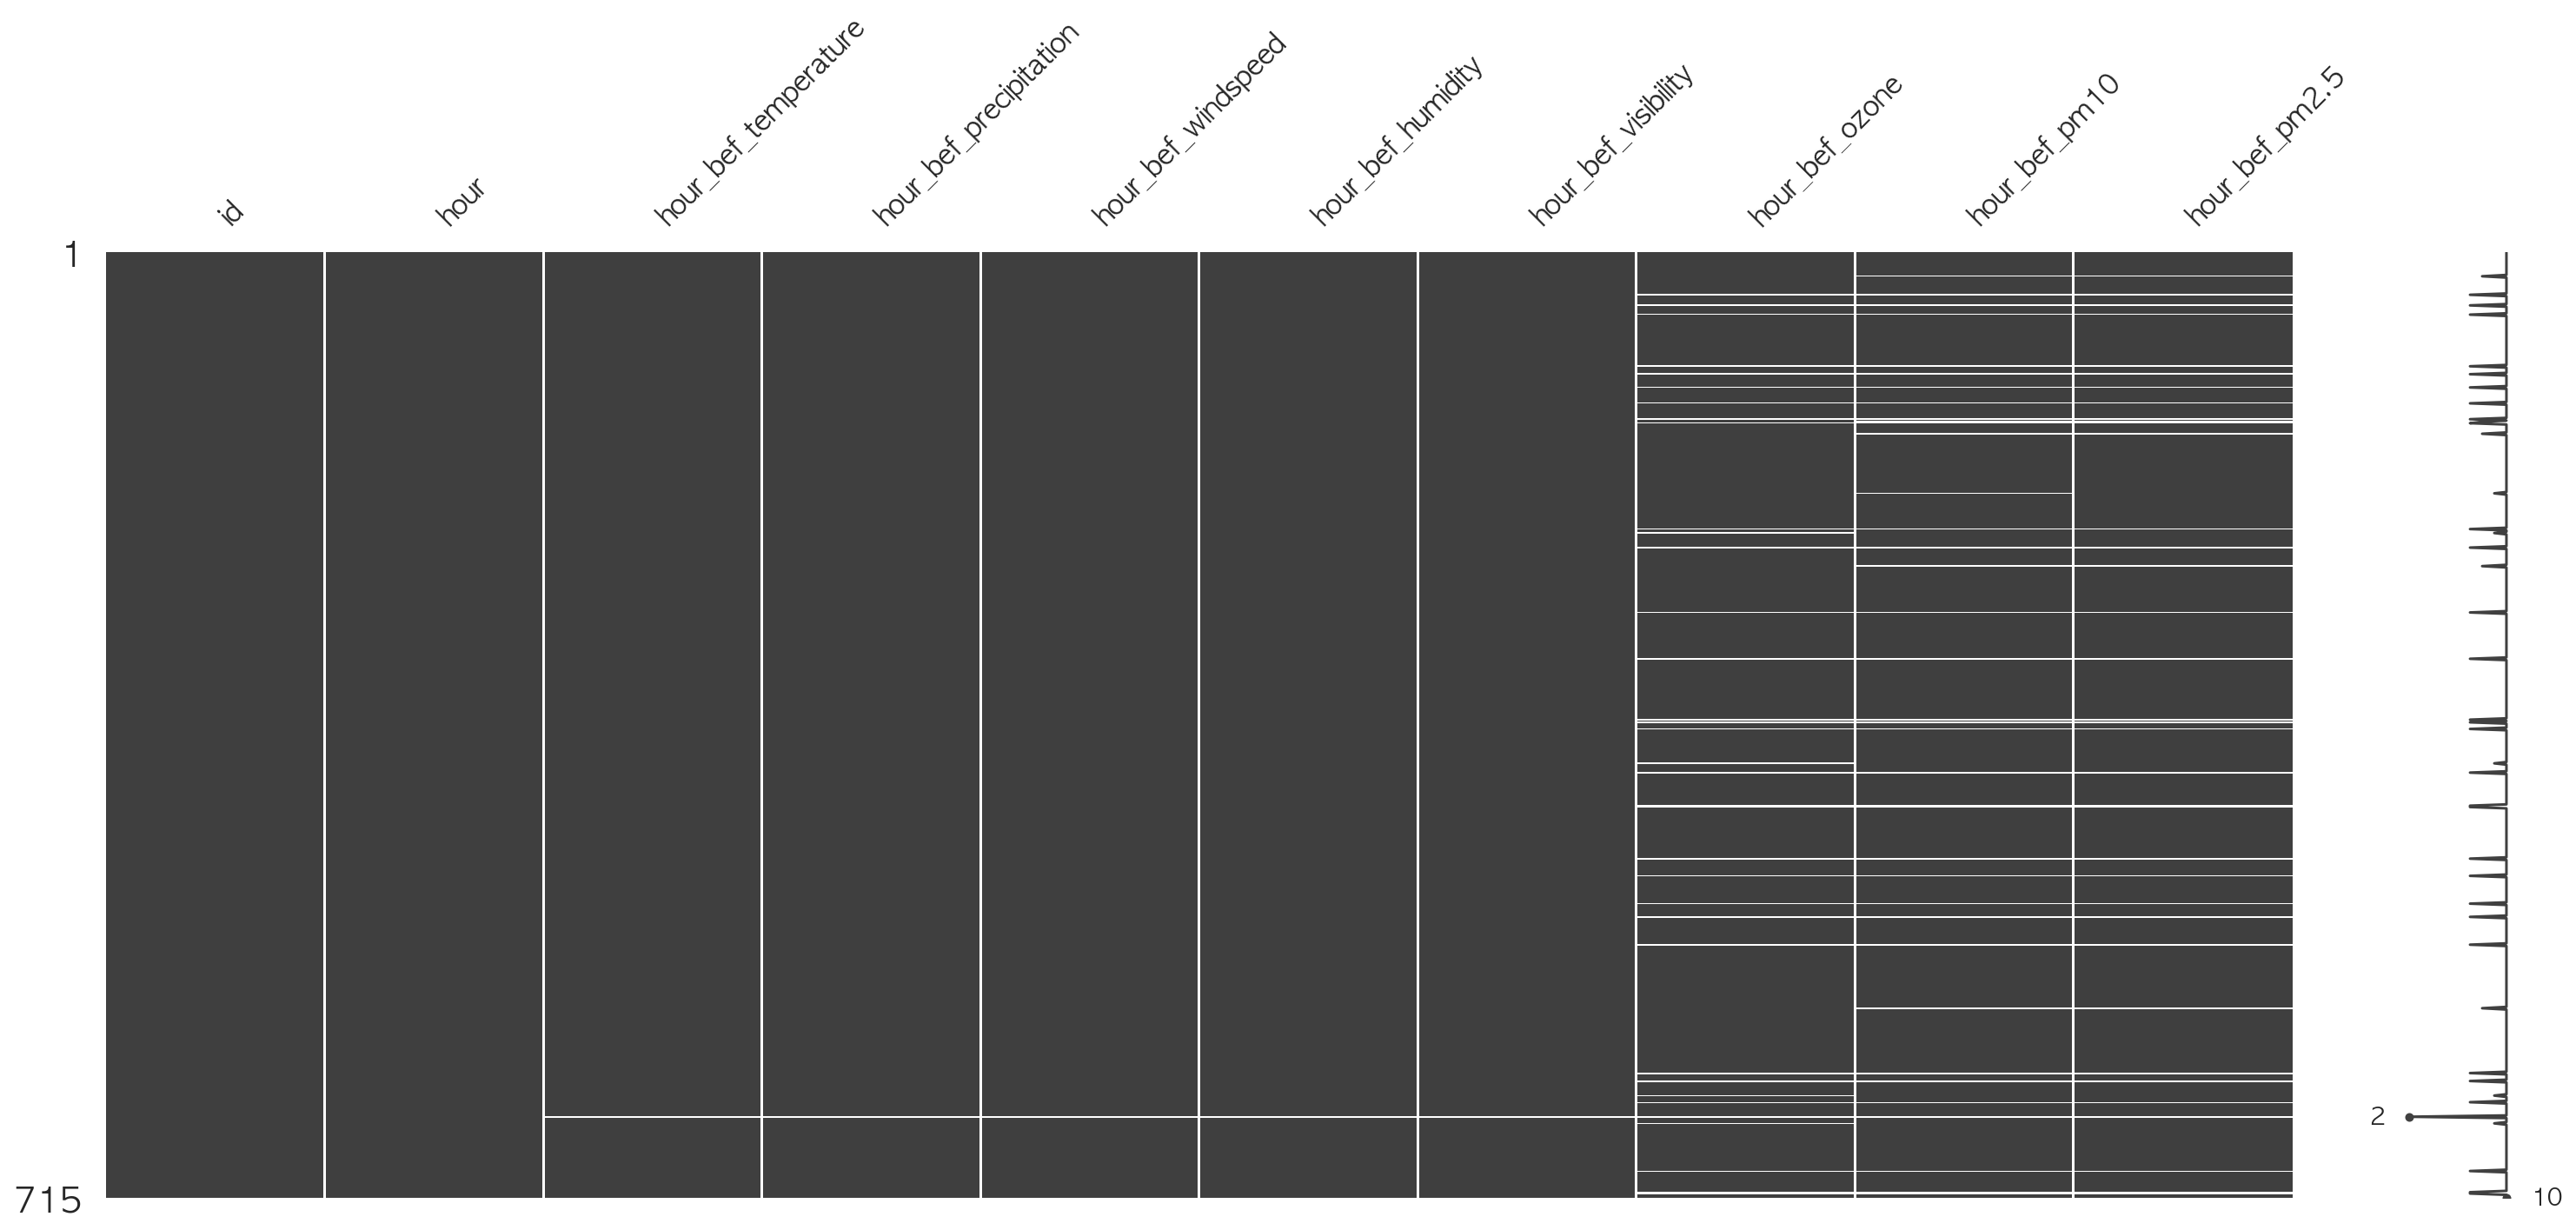

In [13]:
import missingno as msno

msno.matrix(test)

In [14]:
nan_columns = ["hour_bef_temperature", "hour_bef_precipitation", "hour_bef_windspeed", "hour_bef_humidity",
              "hour_bef_visibility", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5"]

for i in nan_columns :
    test[i] = test[i].fillna(test[i].median())

In [15]:
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

---

# E.D.A

## hour 컬럼

In [16]:
train["hour"].nunique()

24

24시간 전부 따릉이를 대여하고 있습니다.

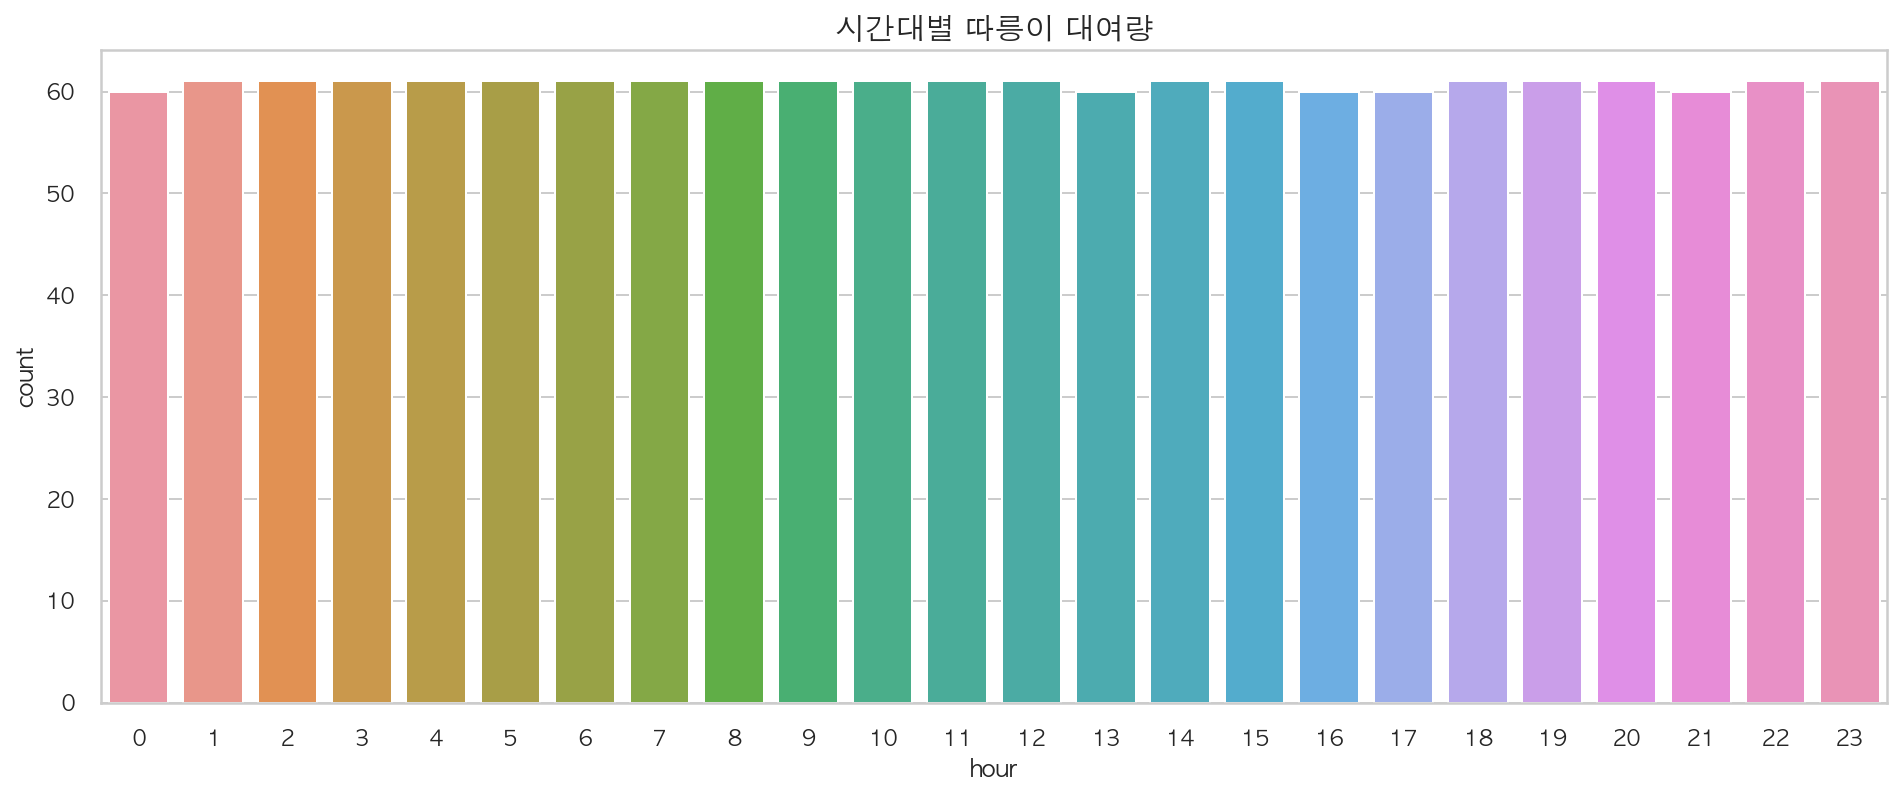

In [17]:
sns.countplot(data = train, x = "hour")

plt.title("시간대별 따릉이 대여량", fontsize = 15)

plt.show()

In [18]:
hour_group = train.groupby(["hour"])["count"].mean().reset_index()

hour_group.columns = ["hour", "count_mean"]

hour_group.head()

,hour,count_mean
0,0,71.766667
1,1,47.606557
2,2,31.409836
3,3,21.377049
4,4,13.524590


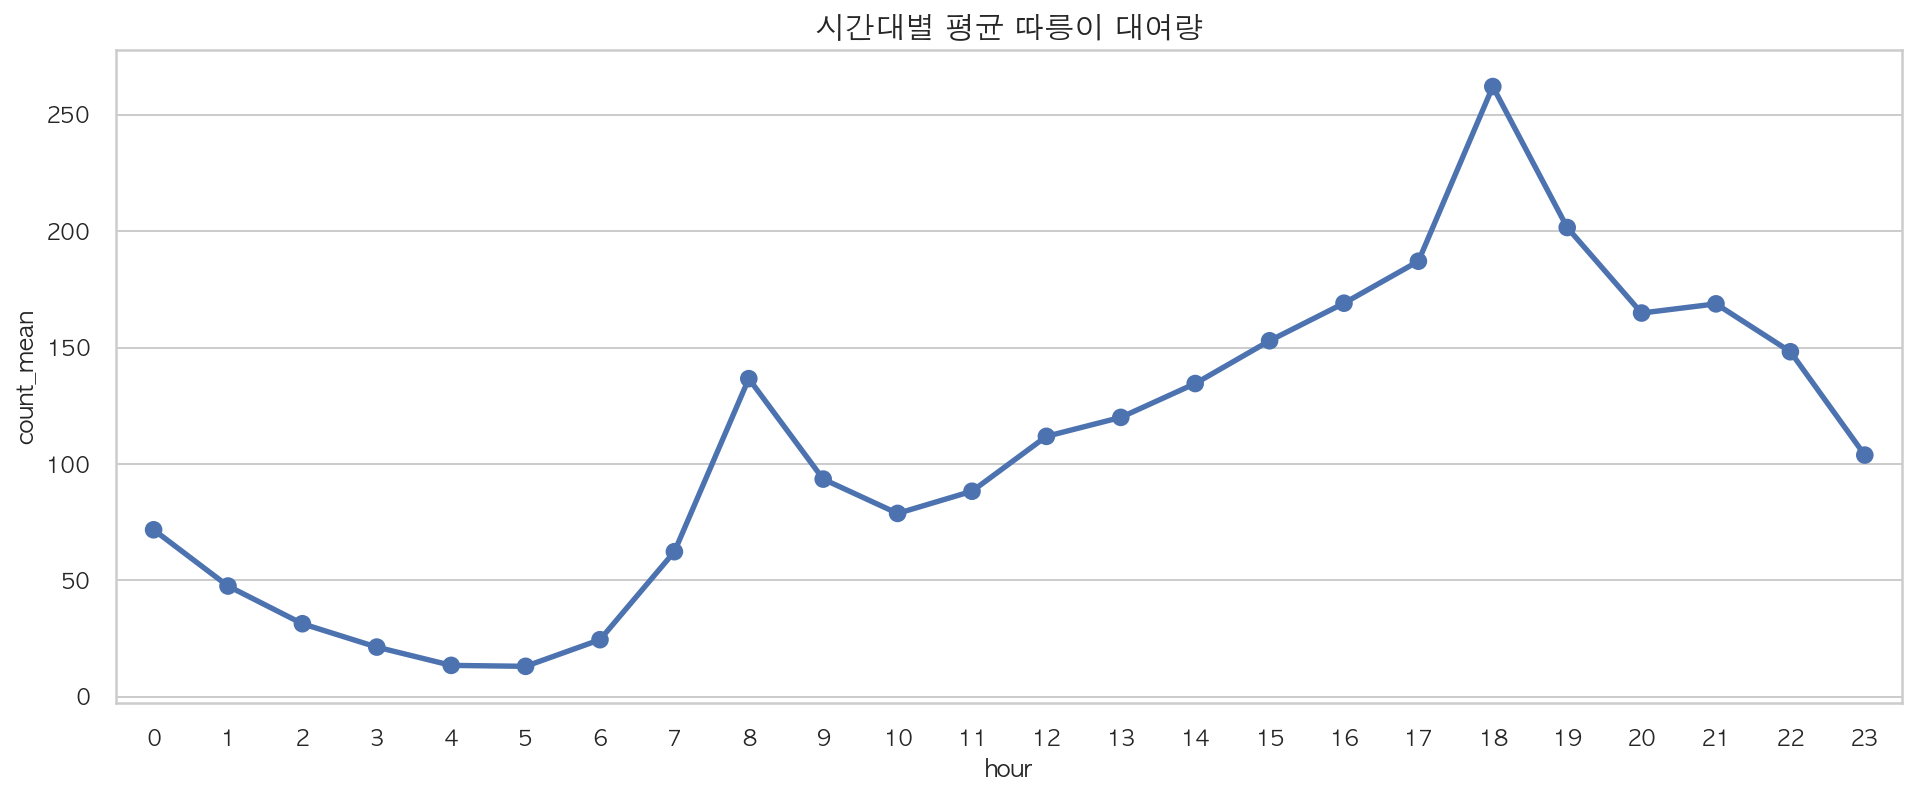

In [19]:
sns.pointplot(data = hour_group, x = "hour", y = "count_mean")

plt.title("시간대별 평균 따릉이 대여량", fontsize = 15)

plt.show()

주로 출근시간(8 ~ 9시) 및 퇴근시간(17시 ~ 19시)에 따릉이를 많이 대여한다는 것을 알 수 있습니다.

---

# hour_bef_temperature 컬럼

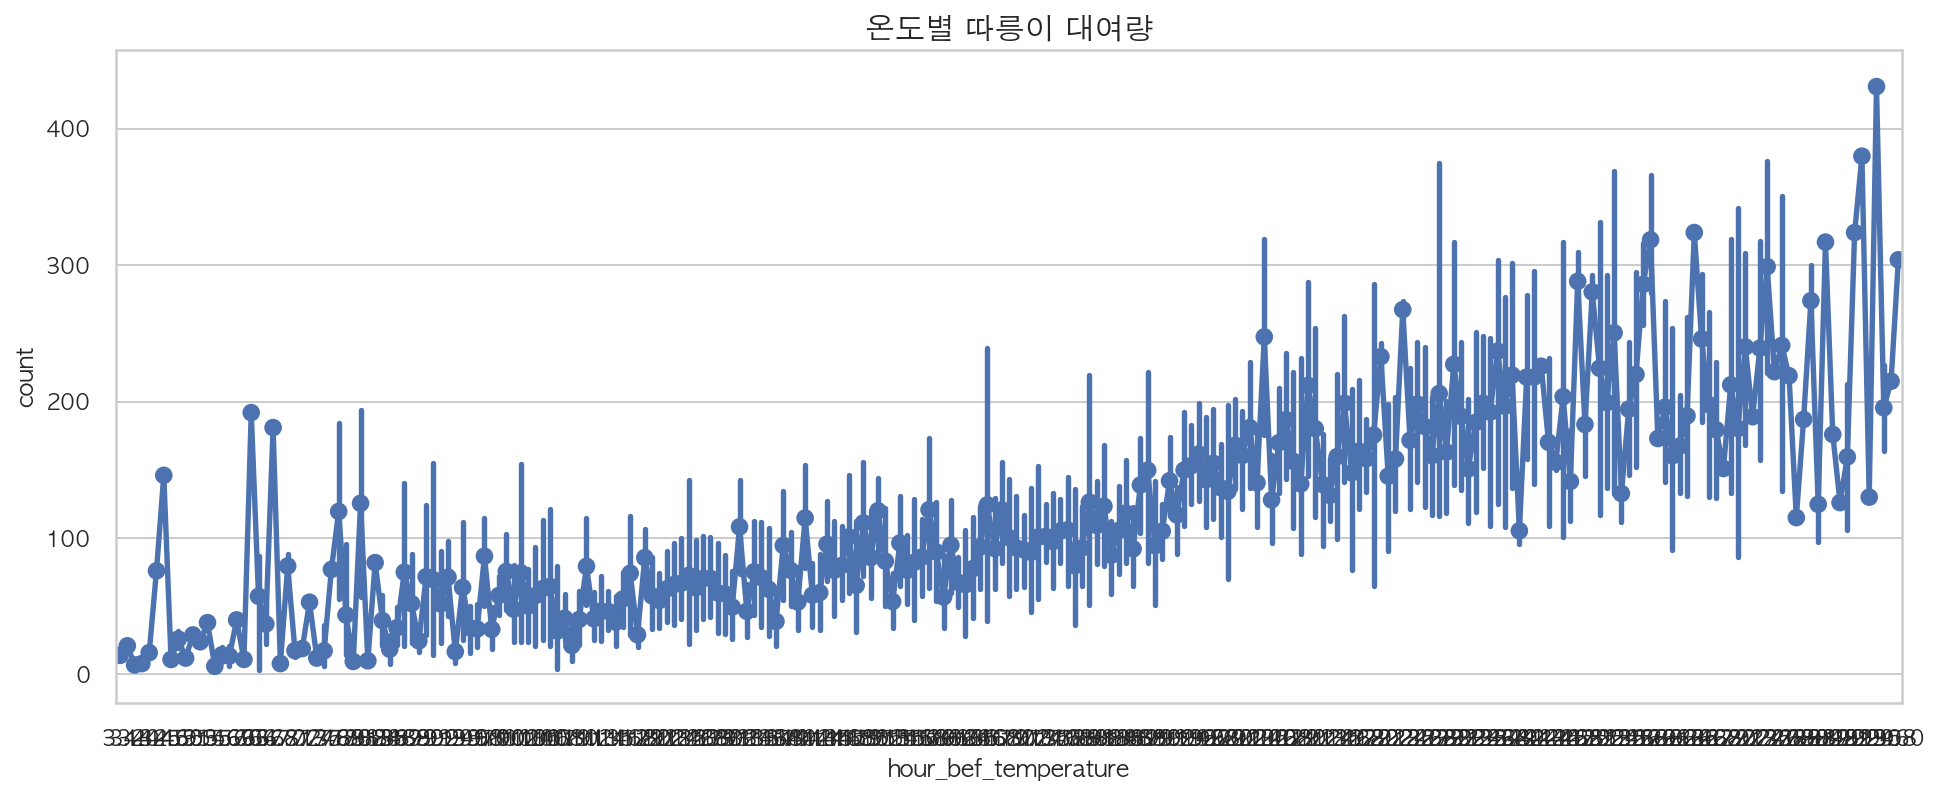

In [20]:
sns.pointplot(data = train, x = "hour_bef_temperature", y = "count")

plt.title("온도별 따릉이 대여량", fontsize = 15)

plt.show()

온도 범위가 넓기 때문에 소수점을 반올림 후 확인 해보도록 하겠습니다.

In [21]:
train["temp_int"] = train["hour_bef_temperature"].round().astype(int)

print(train.shape)
train[["hour_bef_temperature", "temp_int"]].head()

(1459, 12)


,hour_bef_temperature,temp_int
0,16.3,16
1,20.1,20
2,13.9,14
3,8.1,8
4,29.5,30


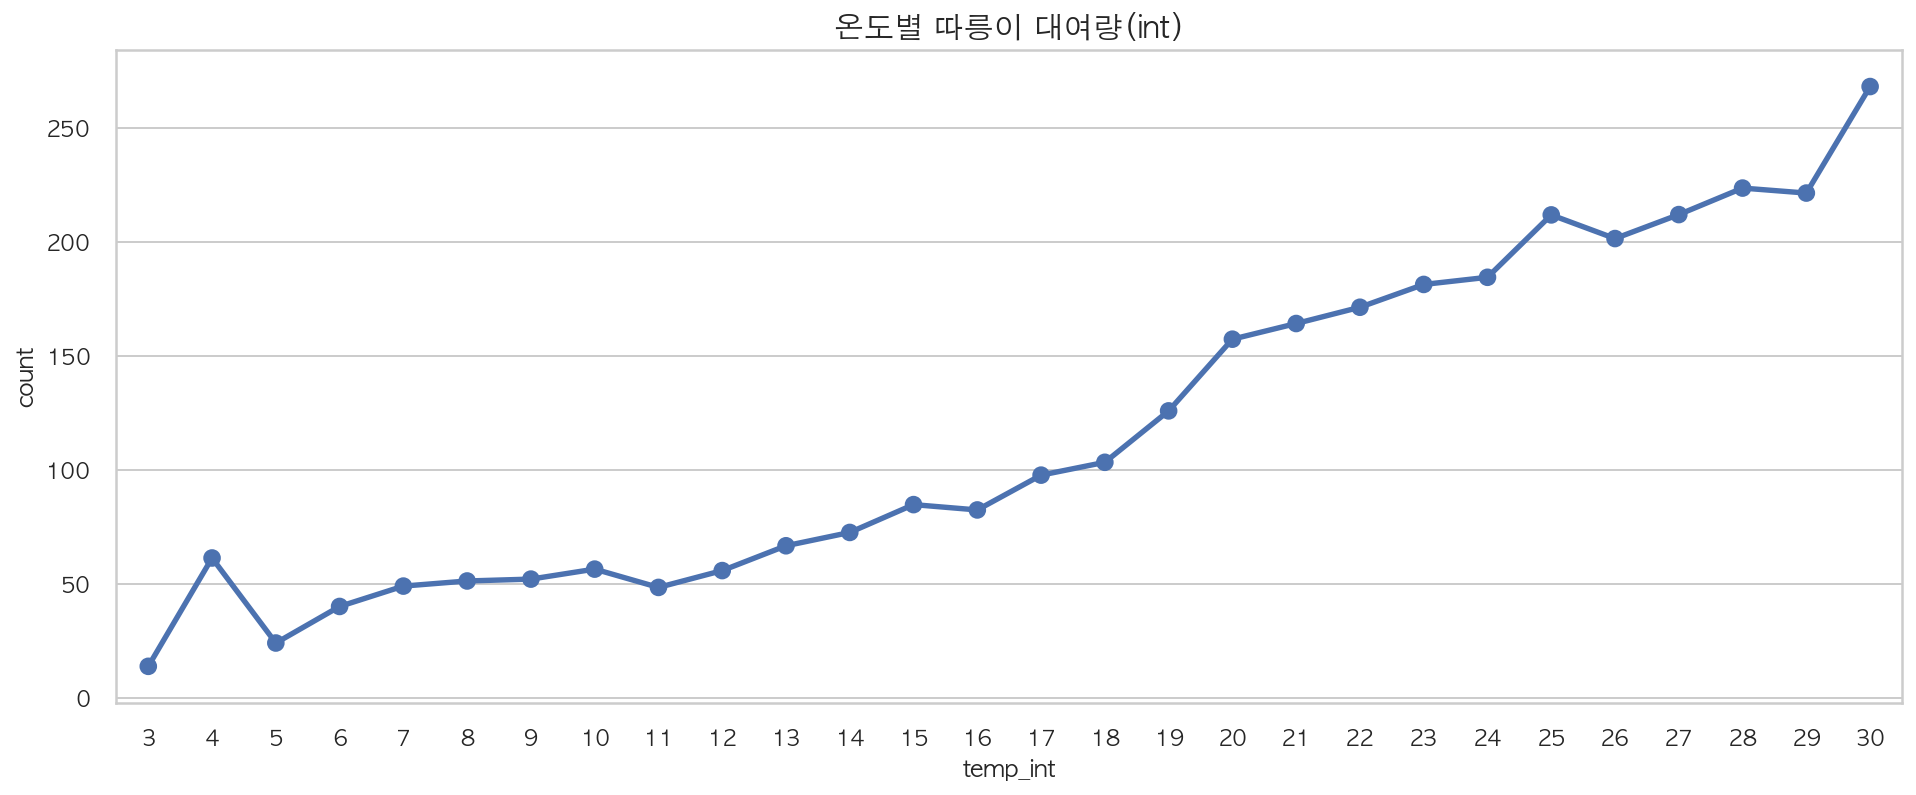

In [22]:
temp_round = train.groupby(["temp_int"])["count"].mean().reset_index()

sns.pointplot(data = temp_round, x = "temp_int", y = "count")

plt.title("온도별 따릉이 대여량(int)", fontsize = 15)

plt.show()

온도가 높을수록 따릉이 대여가 많아지는 것을 확인 할 수 있습니다

In [23]:
test["temp_int"] = test["hour_bef_temperature"].round().astype(int)

print(test.shape)
test[["hour_bef_temperature", "temp_int"]].head()

(715, 11)


,hour_bef_temperature,temp_int
0,20.7,21
1,30.0,30
2,19.0,19
3,22.5,22
4,14.6,15


## hour_bef_precipitation 컬럼

In [24]:
train["hour_bef_precipitation"].value_counts()

0.0    1413
1.0      46
Name: hour_bef_precipitation, dtype: int64

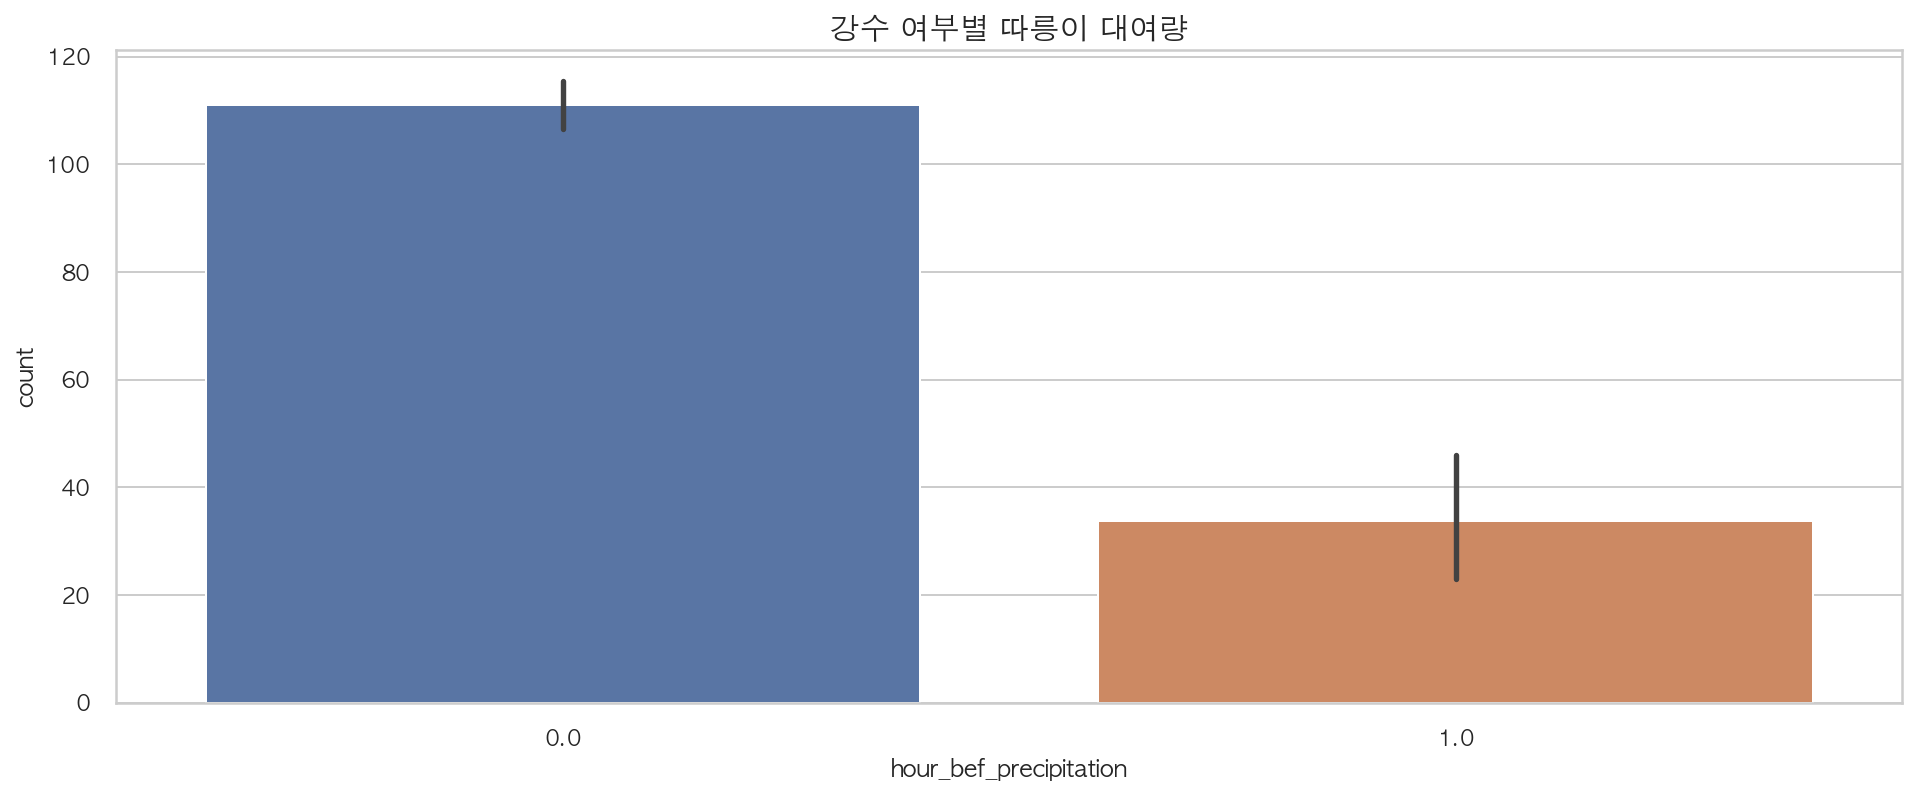

In [25]:
sns.barplot(data = train, x = "hour_bef_precipitation", y = "count")

plt.title("강수 여부별 따릉이 대여량", fontsize = 15)

plt.show()

# 0 = False, 1 = True

0.0315717 데이터는 강수가 있었다고 판단하고 변환 하도록 하겠습니다.

In [26]:
train["hour_bef_precipitation_clean"] = train["hour_bef_precipitation"].apply(lambda x : 0 if x == 0 else 1)

print(train.shape)
train["hour_bef_precipitation_clean"].value_counts()

(1459, 13)


0    1413
1      46
Name: hour_bef_precipitation_clean, dtype: int64

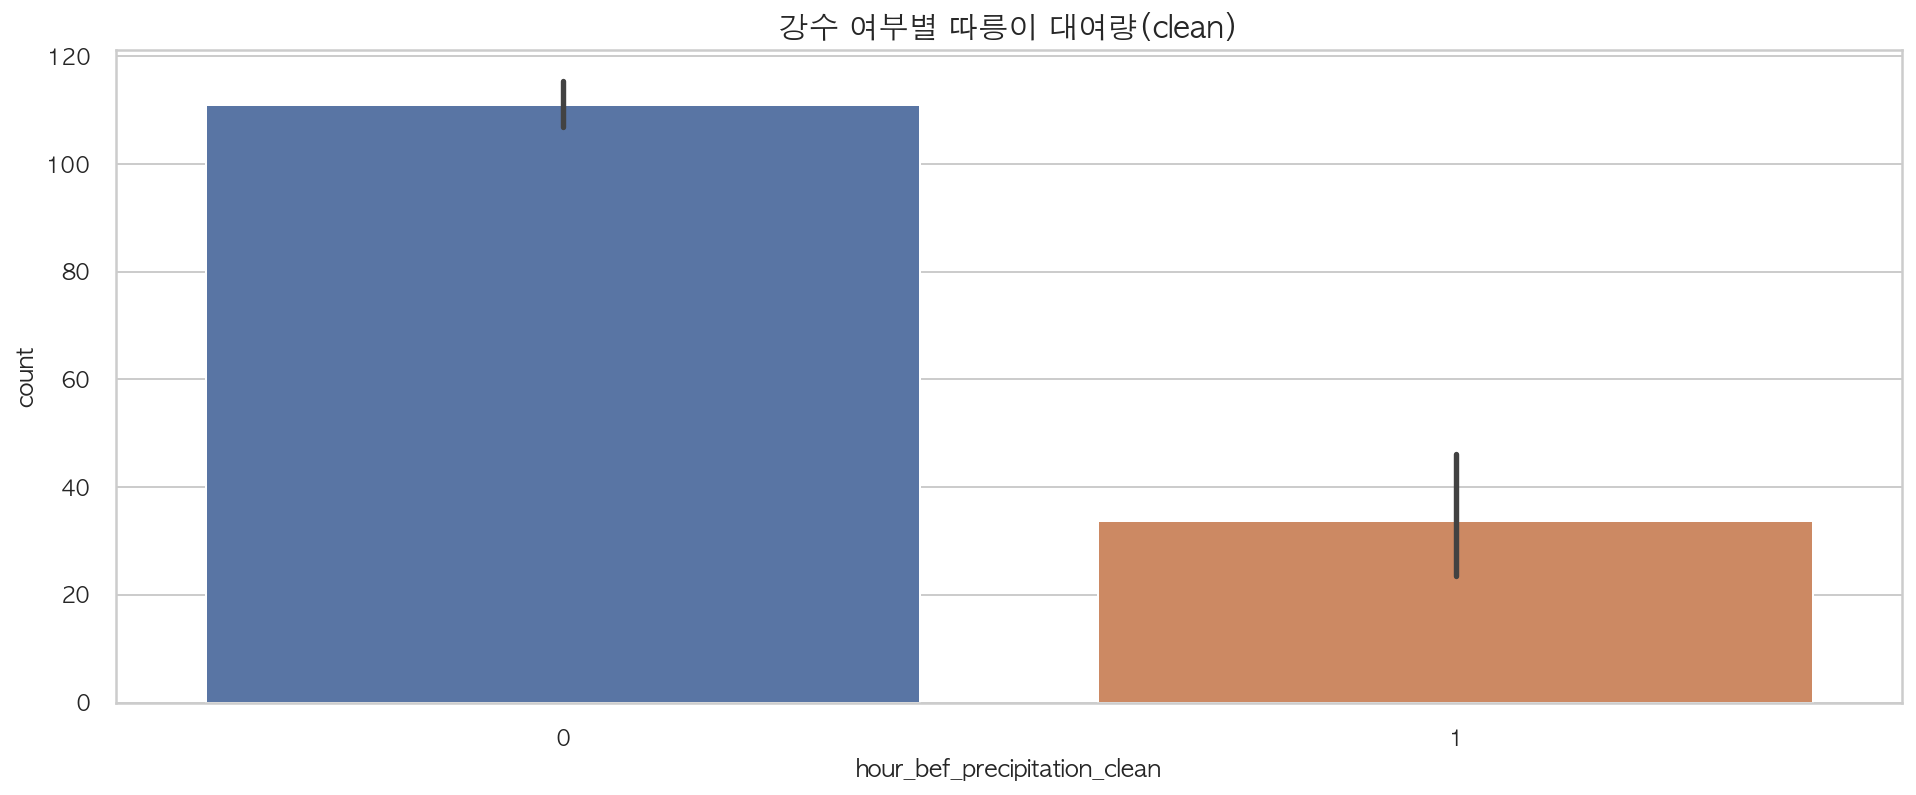

In [27]:
sns.barplot(data = train, x = "hour_bef_precipitation_clean", y = "count")

plt.title("강수 여부별 따릉이 대여량(clean)", fontsize = 15)

plt.show()

# 0 = False, 1 = True

비가 내리지 않을때 대부분 따릉이를 이용하는 것을 알 수 있습니다.

In [28]:
test["hour_bef_precipitation_clean"] = test["hour_bef_precipitation"].apply(lambda x : 0 if x == 0 else 1)

print(train.shape)
test["hour_bef_precipitation_clean"].value_counts()

(1459, 13)


0    678
1     37
Name: hour_bef_precipitation_clean, dtype: int64

## hour_bef_windspeed 컬럼

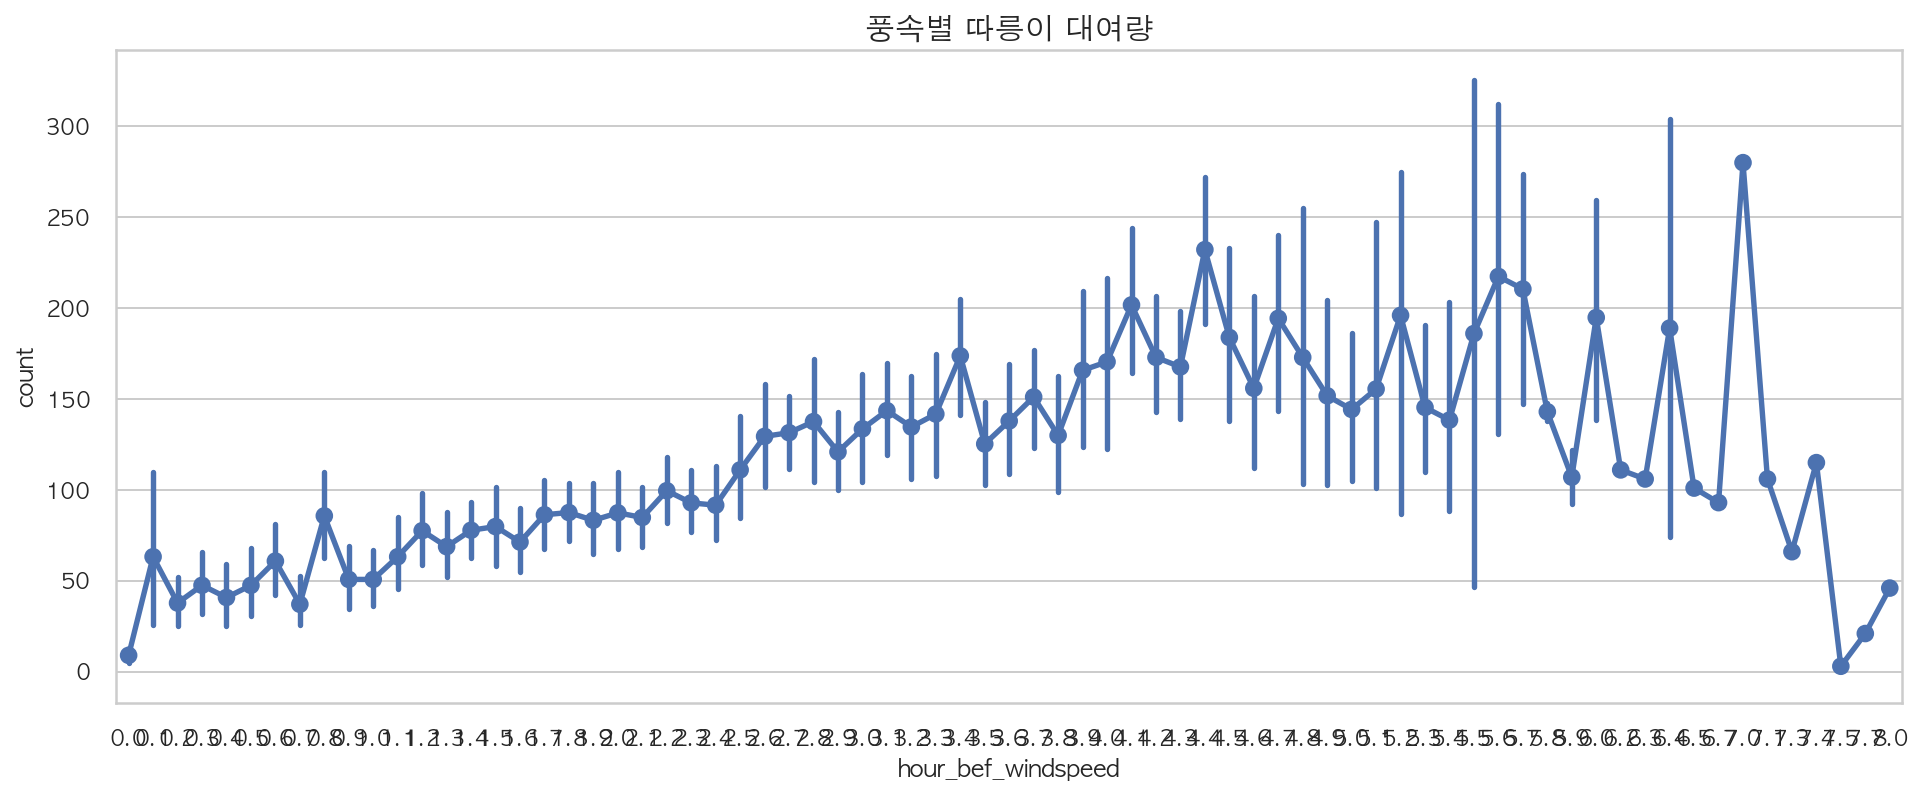

In [29]:
sns.pointplot(data = train, x = "hour_bef_windspeed", y = "count")

plt.title("풍속별 따릉이 대여량", fontsize = 15)

plt.show()

풍속 범위가 넓기 때문에 소수점을 반올림 후 확인 해보도록 하겠습니다.

In [30]:
train["windspeed_int"] = train["hour_bef_windspeed"].round().astype(int)

print(train.shape)
train[["hour_bef_windspeed", "windspeed_int"]].head()

(1459, 14)


,hour_bef_windspeed,windspeed_int
0,1.5,2
1,1.4,1
2,0.7,1
3,2.7,3
4,4.8,5


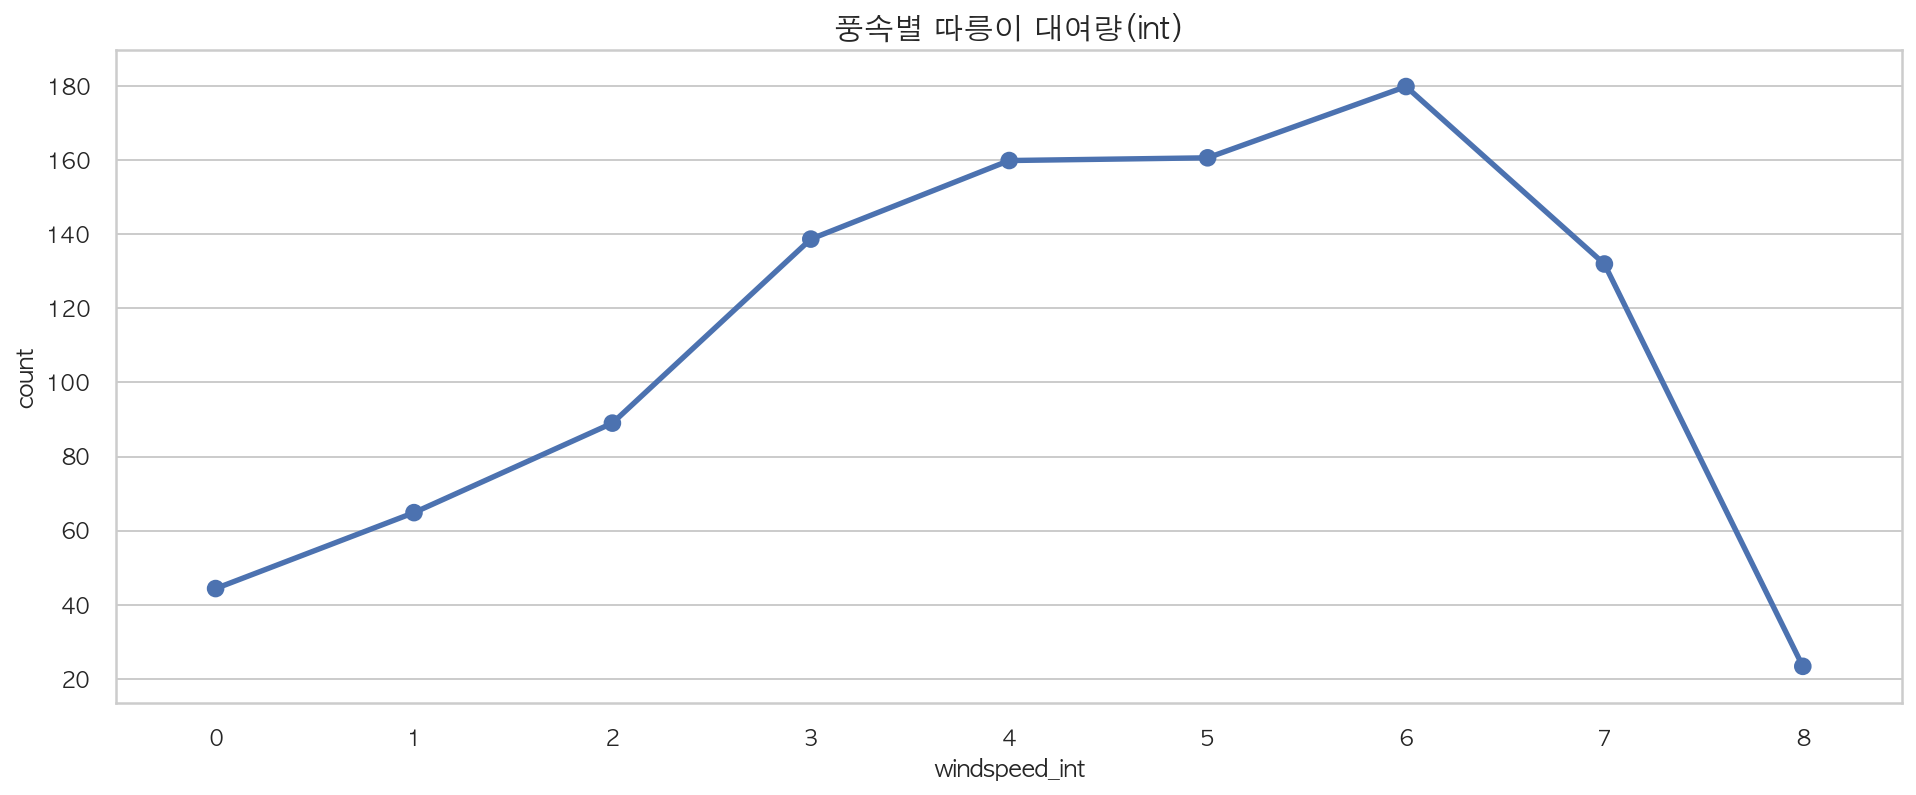

In [31]:
wind_group = train.groupby(["windspeed_int"])["count"].mean().reset_index()

sns.pointplot(data = wind_group, x = "windspeed_int", y = "count")

plt.title("풍속별 따릉이 대여량(int)", fontsize = 15)

plt.show()

풍속이 4 ~ 6 사이일 때 따릉이를 많이 사용하는 것을 알 수 있습니다.

In [32]:
test["windspeed_int"] = test["hour_bef_windspeed"].round().astype(int)

print(test.shape)
test[["hour_bef_windspeed", "windspeed_int"]].head()

(715, 13)


,hour_bef_windspeed,windspeed_int
0,1.3,1
1,5.4,5
2,2.1,2
3,2.5,2
4,3.4,3


## hour_bef_humidity 컬럼

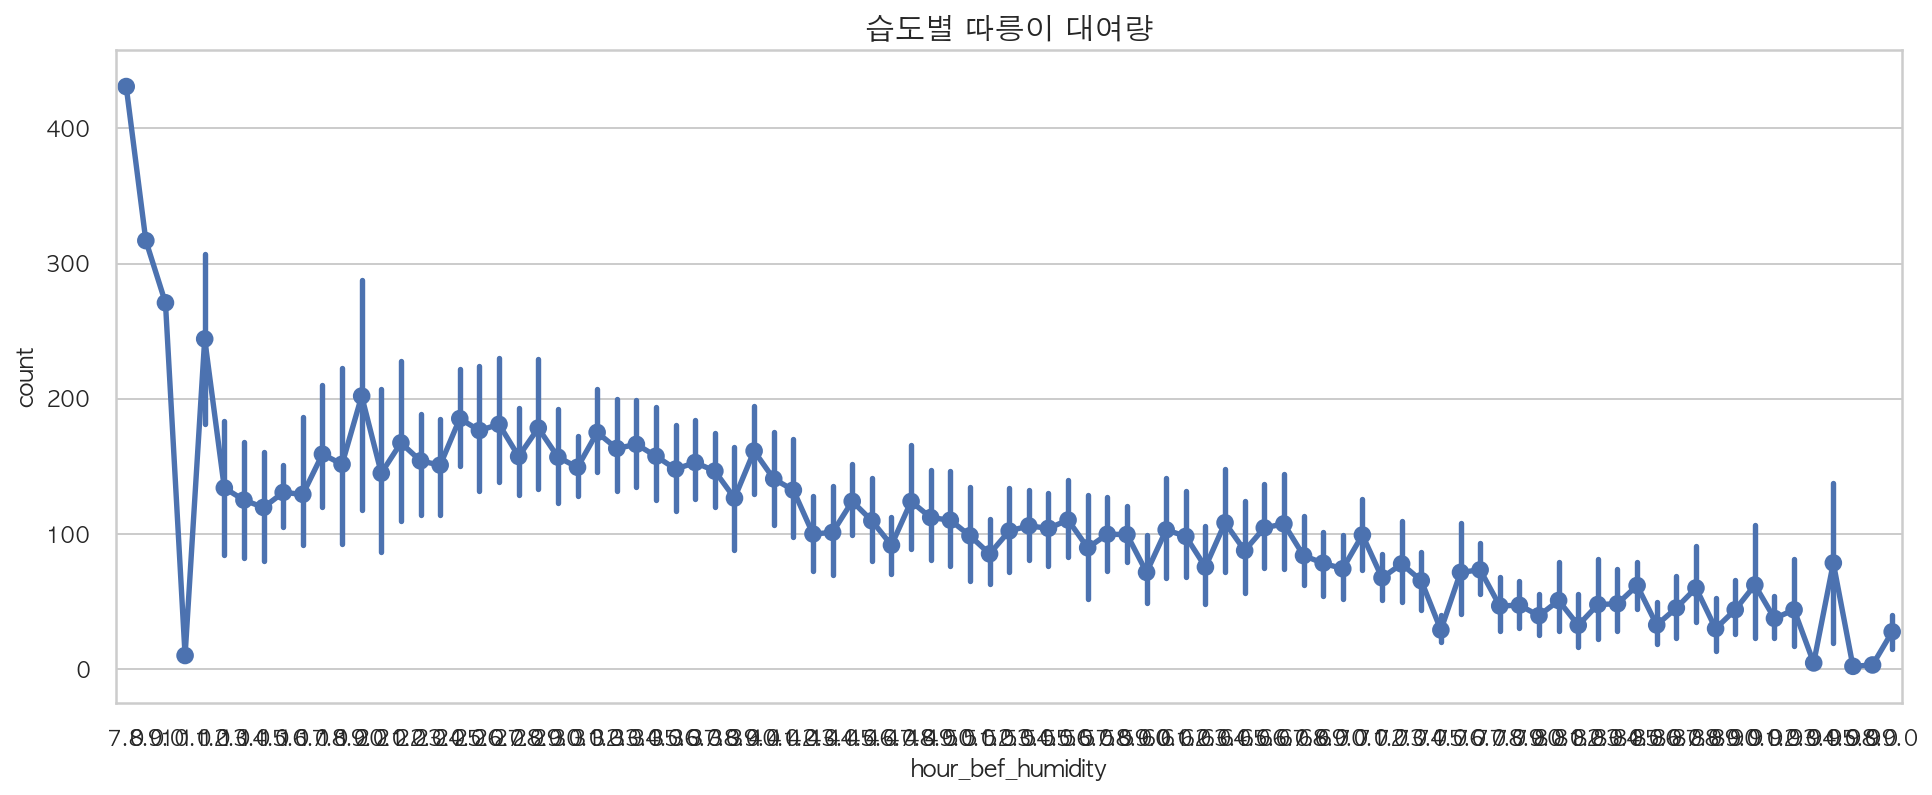

In [33]:
sns.pointplot(data = train, x = "hour_bef_humidity", y = "count")

plt.title("습도별 따릉이 대여량", fontsize = 15)

plt.show()

습도의 범위를 좁혀서 확인 해보도록 하겠습니다.

In [34]:
train["humidity_int"] = train["hour_bef_humidity"].round().astype(int)

print(train.shape)
train[["hour_bef_humidity", "humidity_int"]].head()

(1459, 15)


,hour_bef_humidity,humidity_int
0,89.0,89
1,48.0,48
2,79.0,79
3,54.0,54
4,7.0,7


In [35]:
def clean_humidity(row):
    if row < 10:
        return "under_10"
    
    if row < 20:
        return "under_20"
    
    if row < 30:
        return "under_30"
    
    if row < 40:
        return "under_40"
    
    if row < 50:
        return "under_50"
    
    if row < 60:
        return "under_60"
    
    if row < 70:
        return "under_70"
    
    if row < 80:
        return "under_80"
    
    if row < 90:
        return "under_90"
    
    else:
        return "over_90"

In [36]:
train["humidity_clean"] = train["humidity_int"].apply(clean_humidity)

print(train.shape)
train[["humidity_int", "humidity_clean"]].head()

(1459, 16)


,humidity_int,humidity_clean
0,89,under_90
1,48,under_50
2,79,under_80
3,54,under_60
4,7,under_10


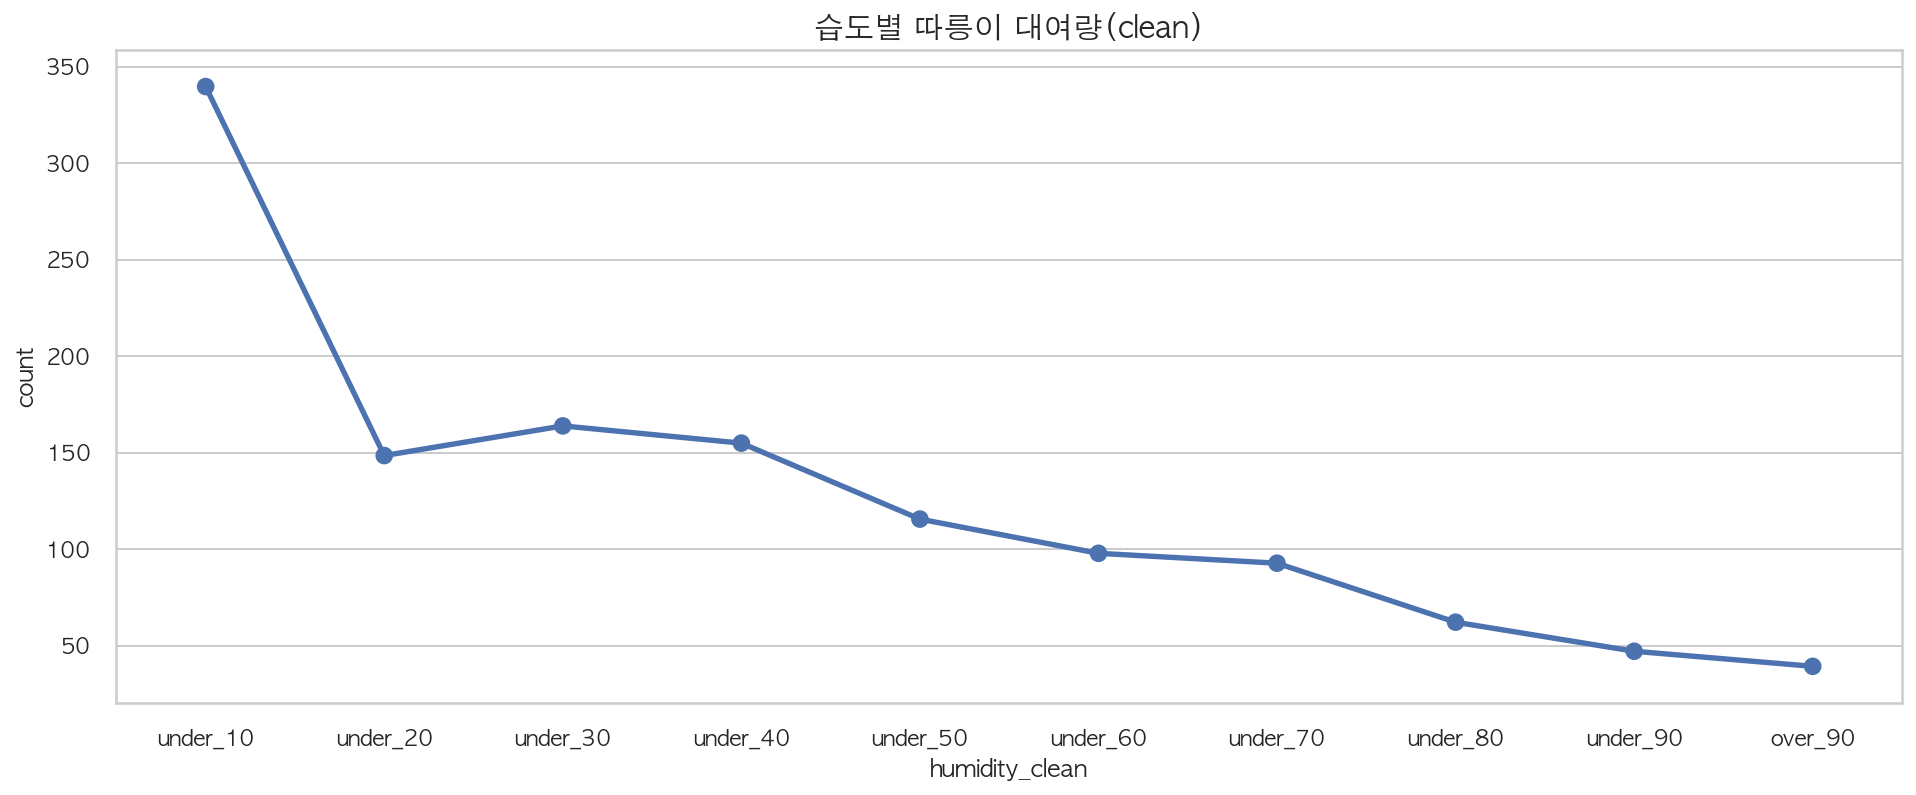

In [37]:
humidity_group = train.groupby(["humidity_clean"])["count"].mean().reset_index()

order = ['under_10', 'under_20', 'under_30', 'under_40', 'under_50', 'under_60',
         'under_70', 'under_80', 'under_90', 'over_90']

sns.pointplot(data = humidity_group, x = "humidity_clean", y = "count", order = order)

plt.title("습도별 따릉이 대여량(clean)", fontsize = 15)

plt.show()

습도가 10 이하일때 따릉이 대여가 가장 많고, 습도가 높아 질 수록 따릉이 대여량이 낮아 지는 것을 알 수 있습니다.

In [38]:
test["humidity_int"] = test["hour_bef_humidity"].round().astype(int)

print(test.shape)
test[["hour_bef_humidity", "humidity_int"]].head()

(715, 14)


,hour_bef_humidity,humidity_int
0,62.0,62
1,33.0,33
2,95.0,95
3,60.0,60
4,93.0,93


In [39]:
test["humidity_clean"] = test["humidity_int"].apply(clean_humidity)

print(test.shape)
test[["humidity_int", "humidity_clean"]].head()

(715, 15)


,humidity_int,humidity_clean
0,62,under_70
1,33,under_40
2,95,over_90
3,60,under_70
4,93,over_90


## hour_bef_visibility 컬럼

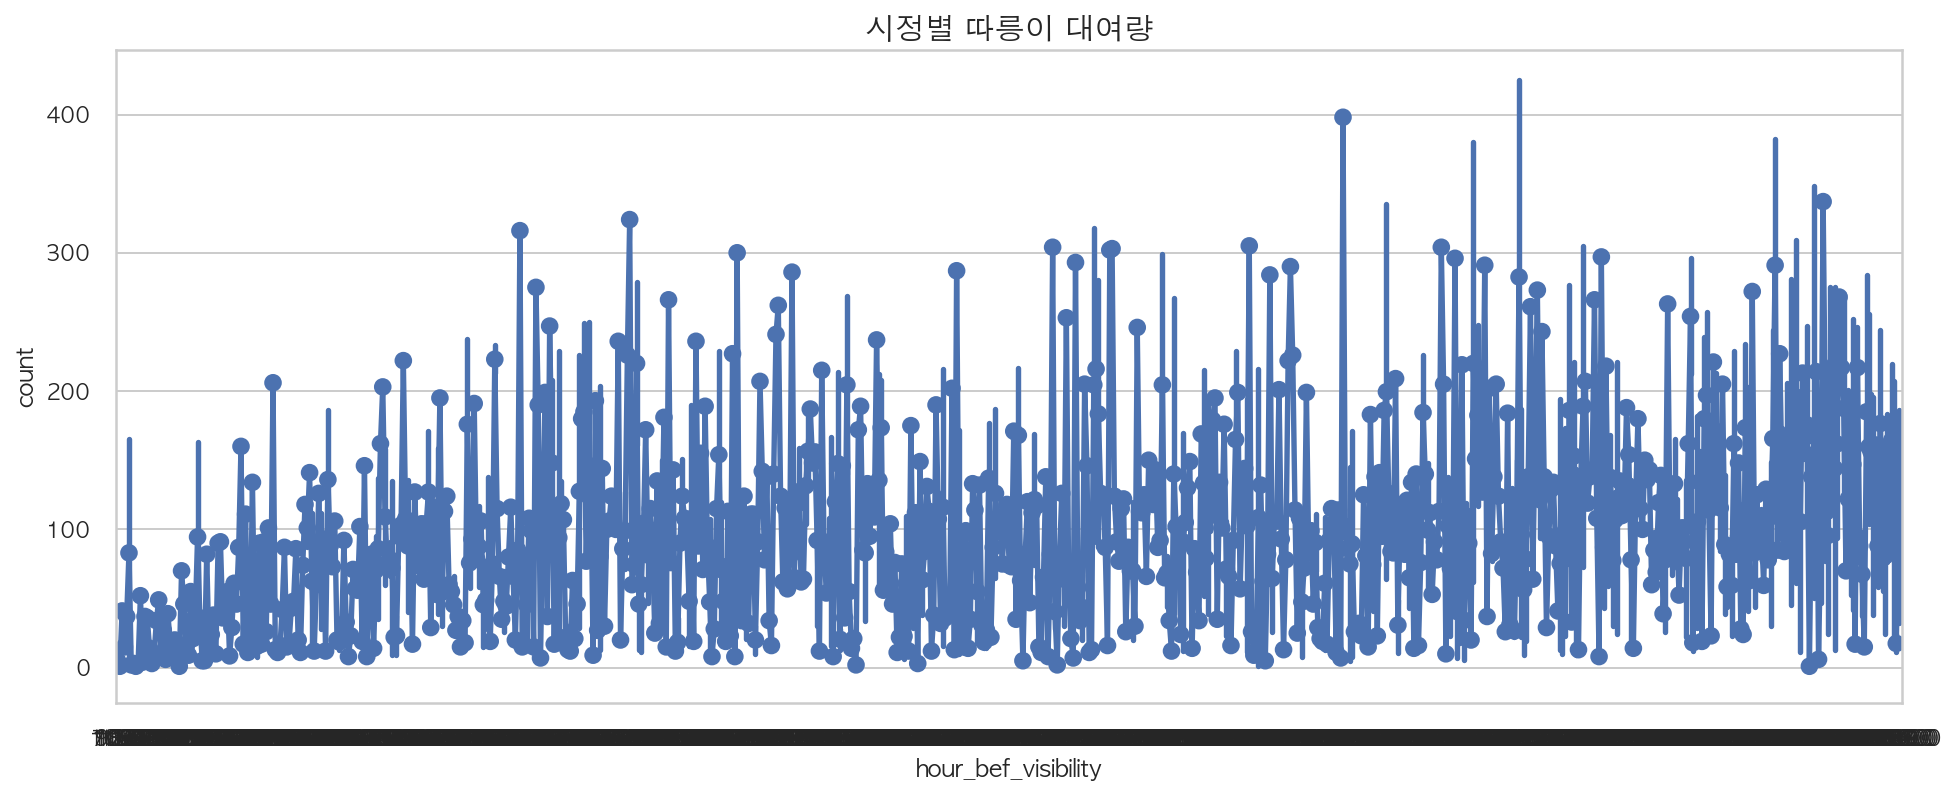

In [40]:
sns.pointplot(data = train, x = "hour_bef_visibility", y = "count")

plt.title("시정별 따릉이 대여량", fontsize = 15)

plt.show()

시정 범위를 좁힌 후 확인 해보도록 하겠습니다.

In [41]:
train["visibility_int"] = train["hour_bef_visibility"].round().astype(int)

print(train.shape)
train[["hour_bef_visibility", "visibility_int"]].head()

(1459, 17)


,hour_bef_visibility,visibility_int
0,576.0,576
1,916.0,916
2,1382.0,1382
3,946.0,946
4,2000.0,2000


In [42]:
def clean_visibility(row):
    if row < 400:
        return "under_400"
    
    if row < 800:
        return "under_800"
    
    if row < 1200:
        return "under_1200"
    
    if row < 1600:
        return "under_1600"
    
    if row < 2000:
        return "under_2000"
    
    else:
        return "over_2000"

In [43]:
train["visibility_clean"] = train["visibility_int"].apply(clean_visibility)

print(train.shape)
train[["visibility_int", "visibility_clean"]].head()

(1459, 18)


,visibility_int,visibility_clean
0,576,under_800
1,916,under_1200
2,1382,under_1600
3,946,under_1200
4,2000,over_2000


In [44]:
train["visibility_clean"].unique()

array(['under_800', 'under_1200', 'under_1600', 'over_2000', 'under_2000',
       'under_400'], dtype=object)

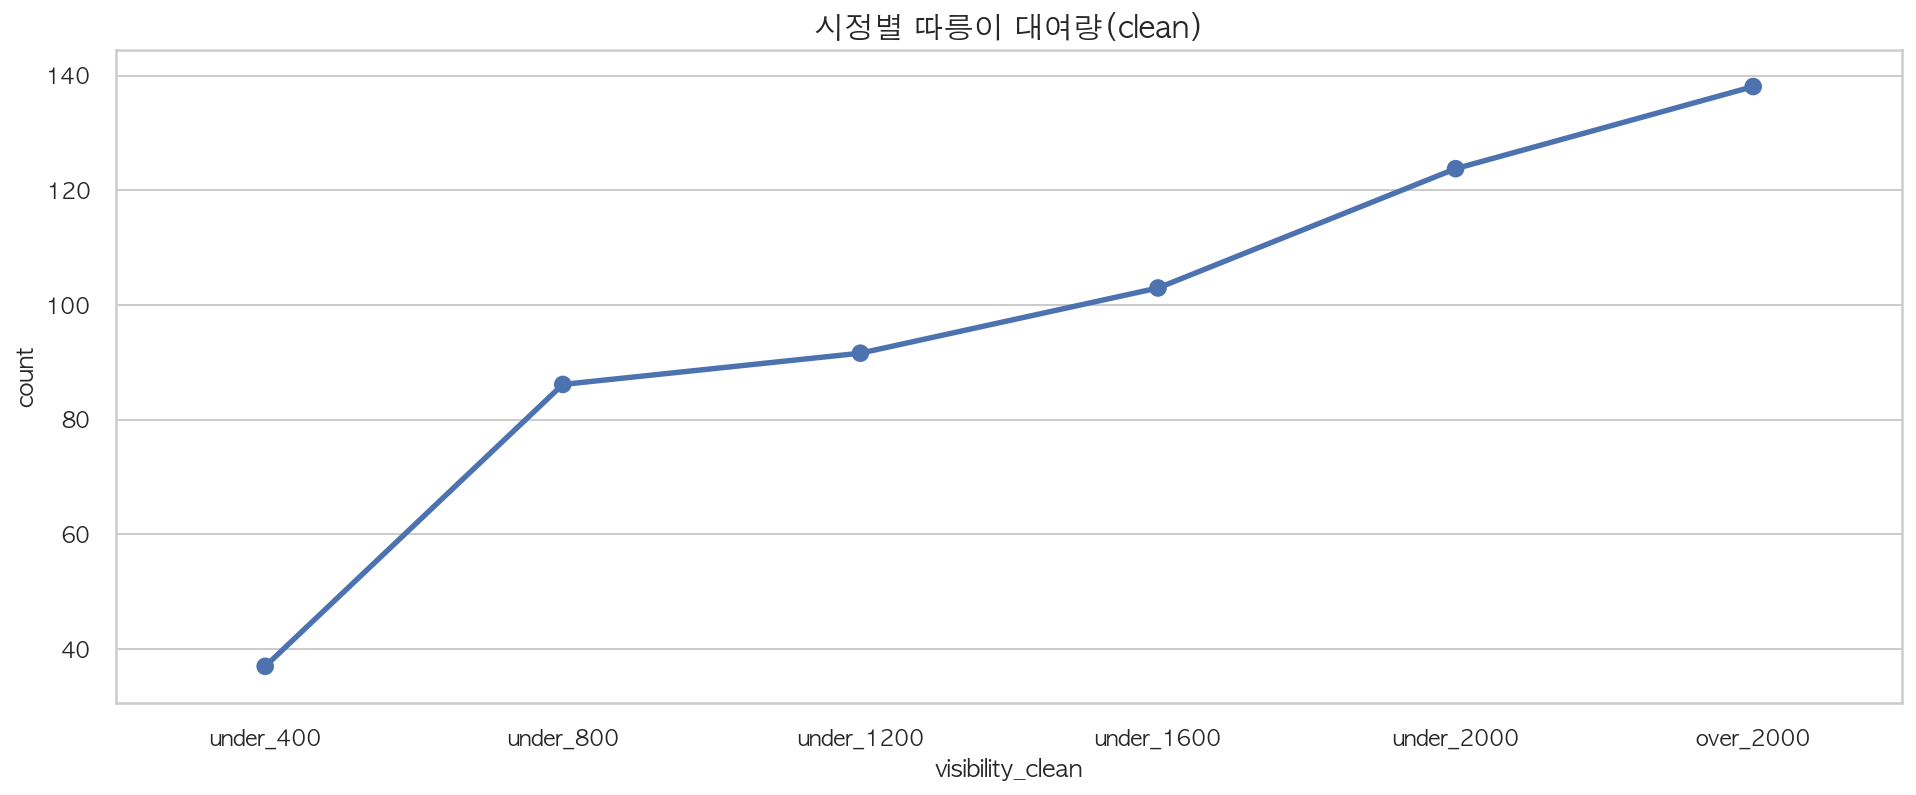

In [45]:
visible_group = train.groupby(["visibility_clean"])["count"].mean().reset_index()

order = ['under_400', 'under_800', 'under_1200', 'under_1600', 'under_2000', 'over_2000']

sns.pointplot(data = visible_group, x = "visibility_clean", y = "count", order = order)

plt.title("시정별 따릉이 대여량(clean)", fontsize = 15)

plt.show()

시정이 좋을 때(수치가 높을 때) 따릉이 대여량이 많다는 것을 알 수 있습니다.

In [46]:
test["visibility_int"] = test["hour_bef_visibility"].round().astype(int)

print(test.shape)
test[["hour_bef_visibility", "visibility_int"]].head()

(715, 16)


,hour_bef_visibility,visibility_int
0,954.0,954
1,1590.0,1590
2,193.0,193
3,1185.0,1185
4,218.0,218


In [47]:
test["visibility_clean"] = test["visibility_int"].apply(clean_visibility)

print(test.shape)
test[["visibility_int", "visibility_clean"]].head()

(715, 17)


,visibility_int,visibility_clean
0,954,under_1200
1,1590,under_1600
2,193,under_400
3,1185,under_1200
4,218,under_400


## hour_bef_ozone 컬럼

In [48]:
train["hour_bef_ozone"].unique()

array([0.027, 0.042, 0.033, 0.04 , 0.057, 0.038, 0.05 , 0.039, 0.025,
       0.028, 0.023, 0.03 , 0.036, 0.046, 0.044, 0.032, 0.014, 0.052,
       0.019, 0.043, 0.035, 0.045, 0.011, 0.016, 0.071, 0.021, 0.015,
       0.034, 0.041, 0.065, 0.06 , 0.051, 0.049, 0.009, 0.026, 0.018,
       0.07 , 0.031, 0.055, 0.072, 0.013, 0.006, 0.024, 0.004, 0.069,
       0.063, 0.054, 0.047, 0.053, 0.005, 0.007, 0.061, 0.022, 0.074,
       0.099, 0.1  , 0.008, 0.082, 0.01 , 0.068, 0.058, 0.062, 0.078,
       0.012, 0.02 , 0.029, 0.037, 0.048, 0.056, 0.067, 0.08 , 0.073,
       0.075, 0.003, 0.064, 0.066, 0.106, 0.093, 0.086, 0.059, 0.088,
       0.081, 0.017, 0.091, 0.083, 0.079, 0.092, 0.077, 0.084, 0.076,
       0.095, 0.09 , 0.098, 0.125, 0.112])

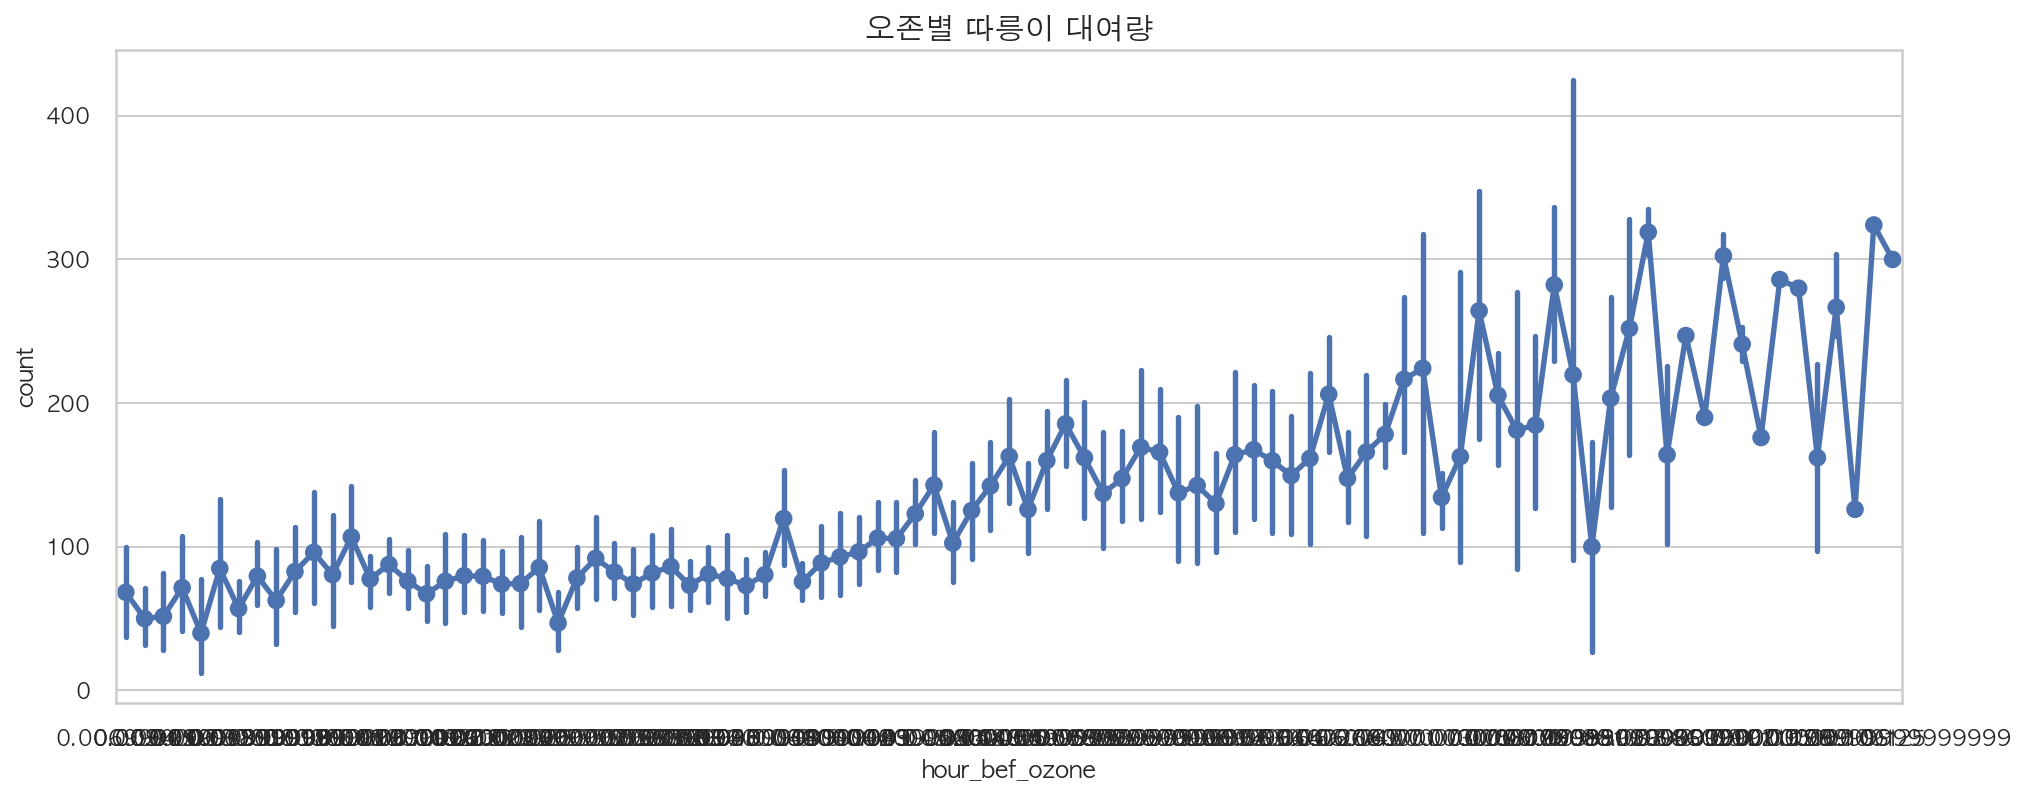

In [49]:
sns.pointplot(data = train, x = "hour_bef_ozone", y = "count")
        
plt.title("오존별 따릉이 대여량", fontsize = 15)

plt.show()

오전 범위를 좁혀서 확인 해보도록 하겠습니다.

In [50]:
train["ozone_clean"] = train["hour_bef_ozone"].round(2)

print(train.shape)
train[["hour_bef_ozone", "ozone_clean"]].head()

(1459, 19)


,hour_bef_ozone,ozone_clean
0,0.027,0.03
1,0.042,0.04
2,0.033,0.03
3,0.040,0.04
4,0.057,0.06


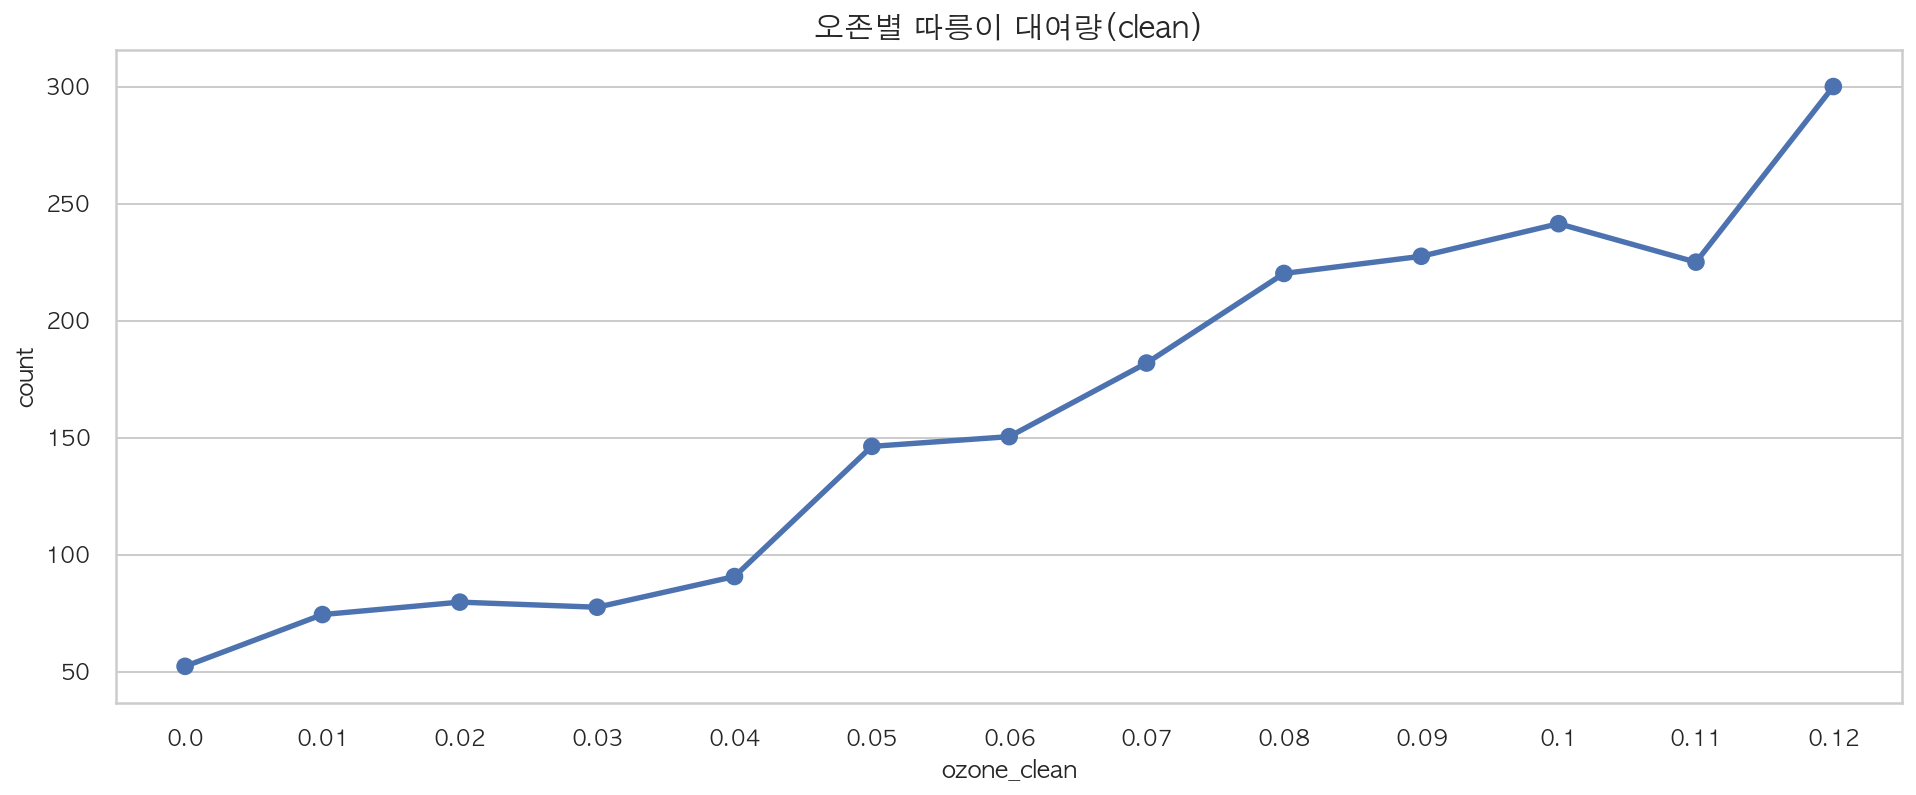

In [51]:
ozone_groupby = train.groupby(["ozone_clean"])["count"].mean().reset_index()

sns.pointplot(data = ozone_groupby, x = "ozone_clean", y = "count")

plt.title("오존별 따릉이 대여량(clean)", fontsize = 15)

plt.show()

오존이 높을 수록 따릉이를 많이 빌리는 것을 알 수 있습니다.

In [52]:
test["ozone_clean"] = test["hour_bef_ozone"].round(2)

print(test.shape)
test[["hour_bef_ozone", "ozone_clean"]].head()

(715, 18)


,hour_bef_ozone,ozone_clean
0,0.041,0.04
1,0.061,0.06
2,0.020,0.02
3,0.027,0.03
4,0.041,0.04


In [53]:
def clean_ozone(row):
    if row < 0.03:
        return "good"
    
    elif row < 0.09:
        return "normal"
    
    elif row < 0.15:
        return "bad"
    
    else:
        return "very bad"

In [54]:
train["ozone_state"] = train["ozone_clean"].apply(clean_ozone)

print(train.shape)
train[["ozone_clean", "ozone_state"]].head()

(1459, 20)


,ozone_clean,ozone_state
0,0.03,normal
1,0.04,normal
2,0.03,normal
3,0.04,normal
4,0.06,normal


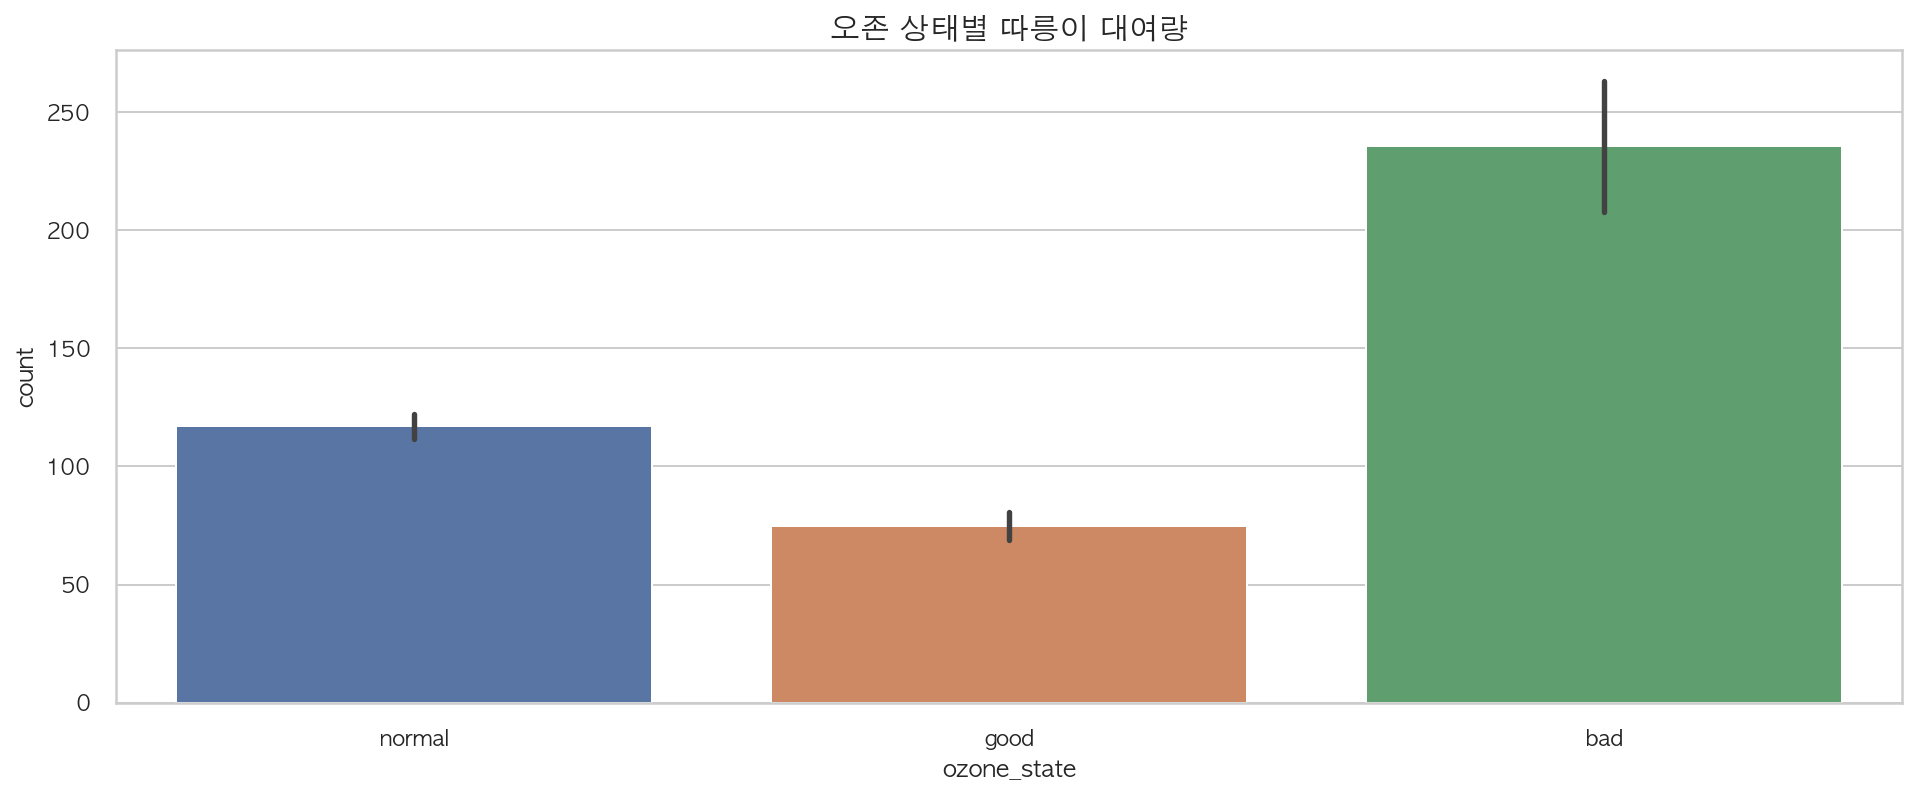

In [55]:
sns.barplot(data = train, x = "ozone_state", y = "count")

plt.title("오존 상태별 따릉이 대여량", fontsize = 15)

plt.show()

오존 상태가 나쁠때 따릉이 대여량이 상당히 높은 것을 확인 할 수 있습니다.

즉, 따릉이를 대여할때 오존의 수치보다는 다른 요인에 더 영향을 받는다고 볼 수 있습니다.

In [56]:
test["ozone_state"] = test["ozone_clean"].apply(clean_ozone)

print(test.shape)
test[["ozone_clean", "ozone_state"]].head()

(715, 19)


,ozone_clean,ozone_state
0,0.04,normal
1,0.06,normal
2,0.02,good
3,0.03,normal
4,0.04,normal


## hour_bef_pm10 컬럼

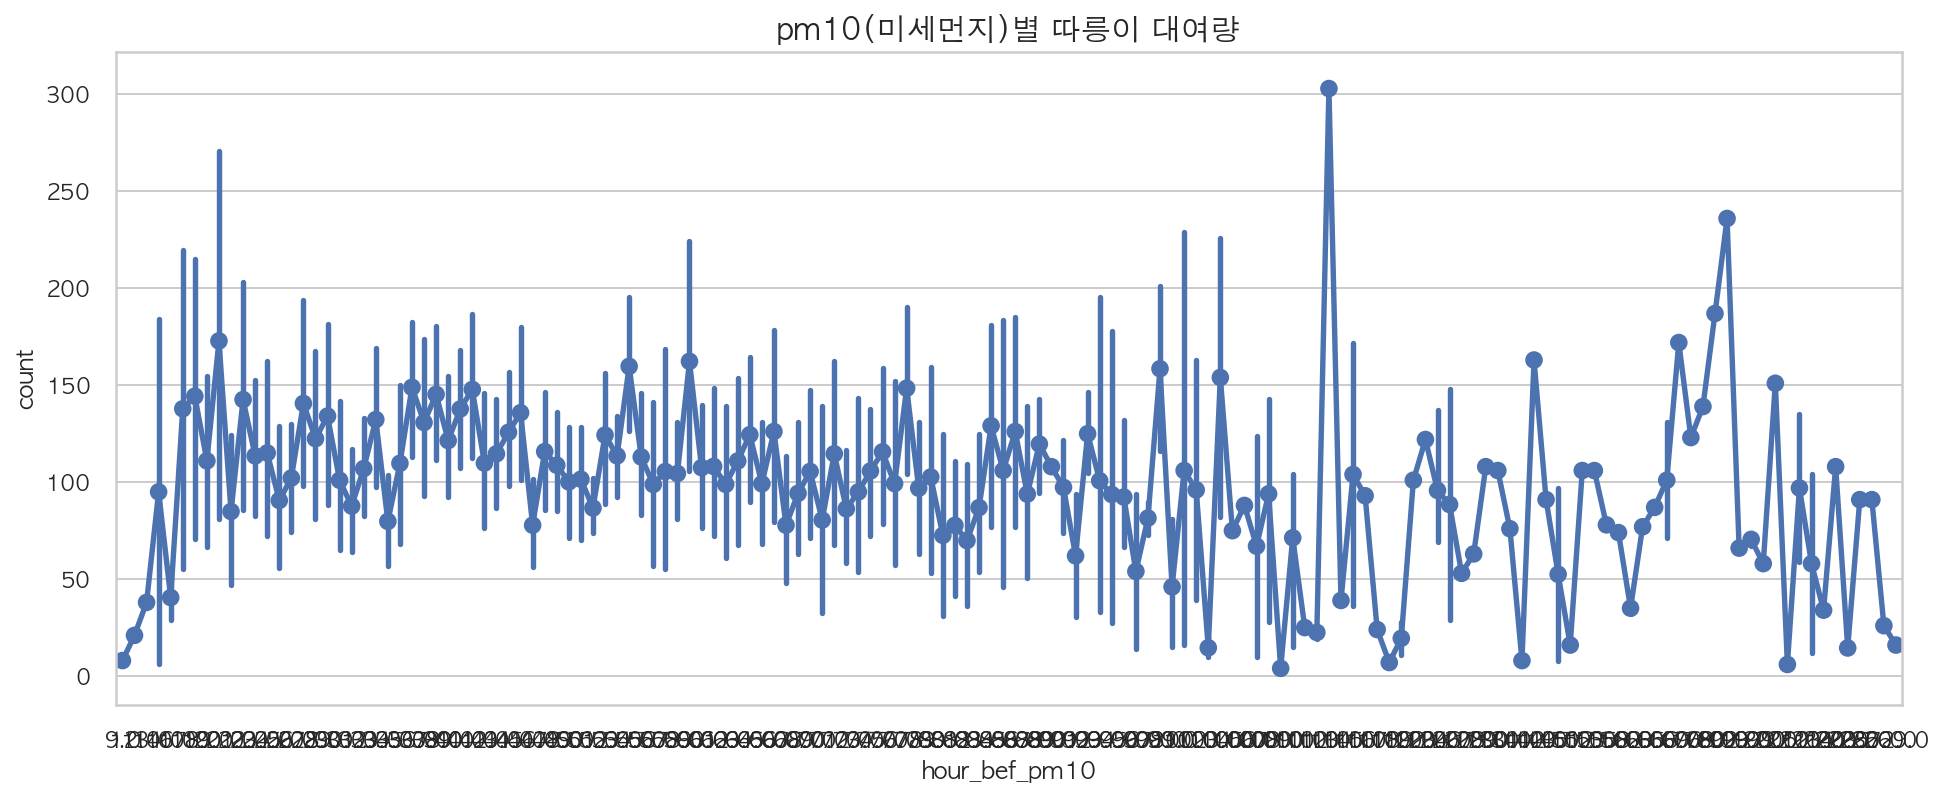

In [57]:
sns.pointplot(data = train, x = "hour_bef_pm10", y = "count")

plt.title("pm10(미세먼지)별 따릉이 대여량", fontsize = 15)

plt.show()

pm10 범위를 좁혀서 확인 해보도록 하겠습니다

In [58]:
def find_pm10(row):
    if row < 30:
        return "under_30"
    
    elif row < 60:
        return "under_60"
    
    elif row < 90:
        return "under_90"
    
    elif row < 120:
        return "under_120"
    
    elif row < 150:
        return "under_150"
    
    elif row < 180:
        return "under_180"
    
    elif row < 210:
        return "under_210"
    
    else:
        return "over_210"

In [59]:
train["pm10_clean"] = train["hour_bef_pm10"].apply(find_pm10)

print(train.shape)
train[["hour_bef_pm10", "pm10_clean"]].head()

(1459, 21)


,hour_bef_pm10,pm10_clean
0,76.0,under_90
1,73.0,under_90
2,32.0,under_60
3,75.0,under_90
4,27.0,under_30


In [60]:
train["pm10_clean"].unique()

array(['under_90', 'under_60', 'under_30', 'under_120', 'under_210',
       'over_210', 'under_180', 'under_150'], dtype=object)

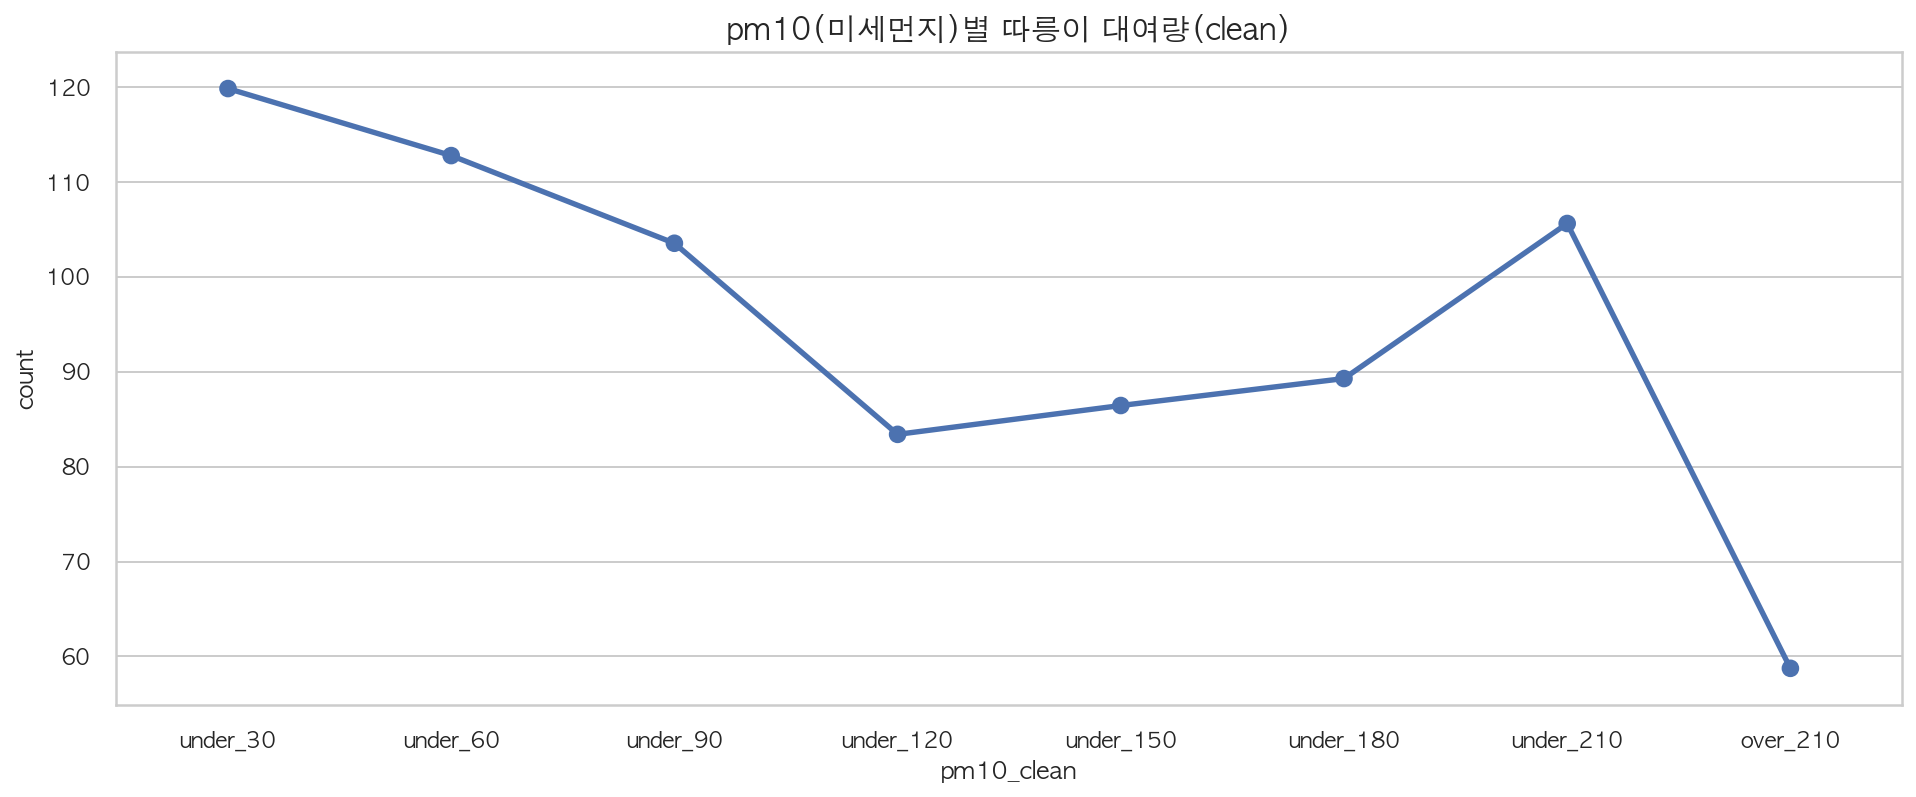

In [61]:
pm10_group = train.groupby(["pm10_clean"])["count"].mean().reset_index()

order = ['under_30', 'under_60', 'under_90', 'under_120', 'under_150', 'under_180', 'under_210', 'over_210']

sns.pointplot(data = pm10_group, x = "pm10_clean", y = "count", order = order)

plt.title("pm10(미세먼지)별 따릉이 대여량(clean)", fontsize = 15)

plt.show()

pm10 이 높아지며 따릉이 대여량이 줄어들지만, 210 일때 갑자기 상승하는 현상이 나타나고 있습니다.

In [62]:
test["pm10_clean"] = test["hour_bef_pm10"].apply(find_pm10)

print(test.shape)
test[["hour_bef_pm10", "pm10_clean"]].head()

(715, 20)


,hour_bef_pm10,pm10_clean
0,44.0,under_60
1,49.0,under_60
2,36.0,under_60
3,52.0,under_60
4,18.0,under_30


In [63]:
def clean_pm10(row):
    if row < 30:
        return "good"
    
    elif row < 80:
        return "normal"
    
    elif row < 150:
        return "bad"
    
    else:
        return "very bad"

In [64]:
train["pm10_state"] = train["hour_bef_pm10"].apply(clean_pm10)

print(train.shape)
train[["hour_bef_pm10", "pm10_state"]].head()

(1459, 22)


,hour_bef_pm10,pm10_state
0,76.0,normal
1,73.0,normal
2,32.0,normal
3,75.0,normal
4,27.0,good


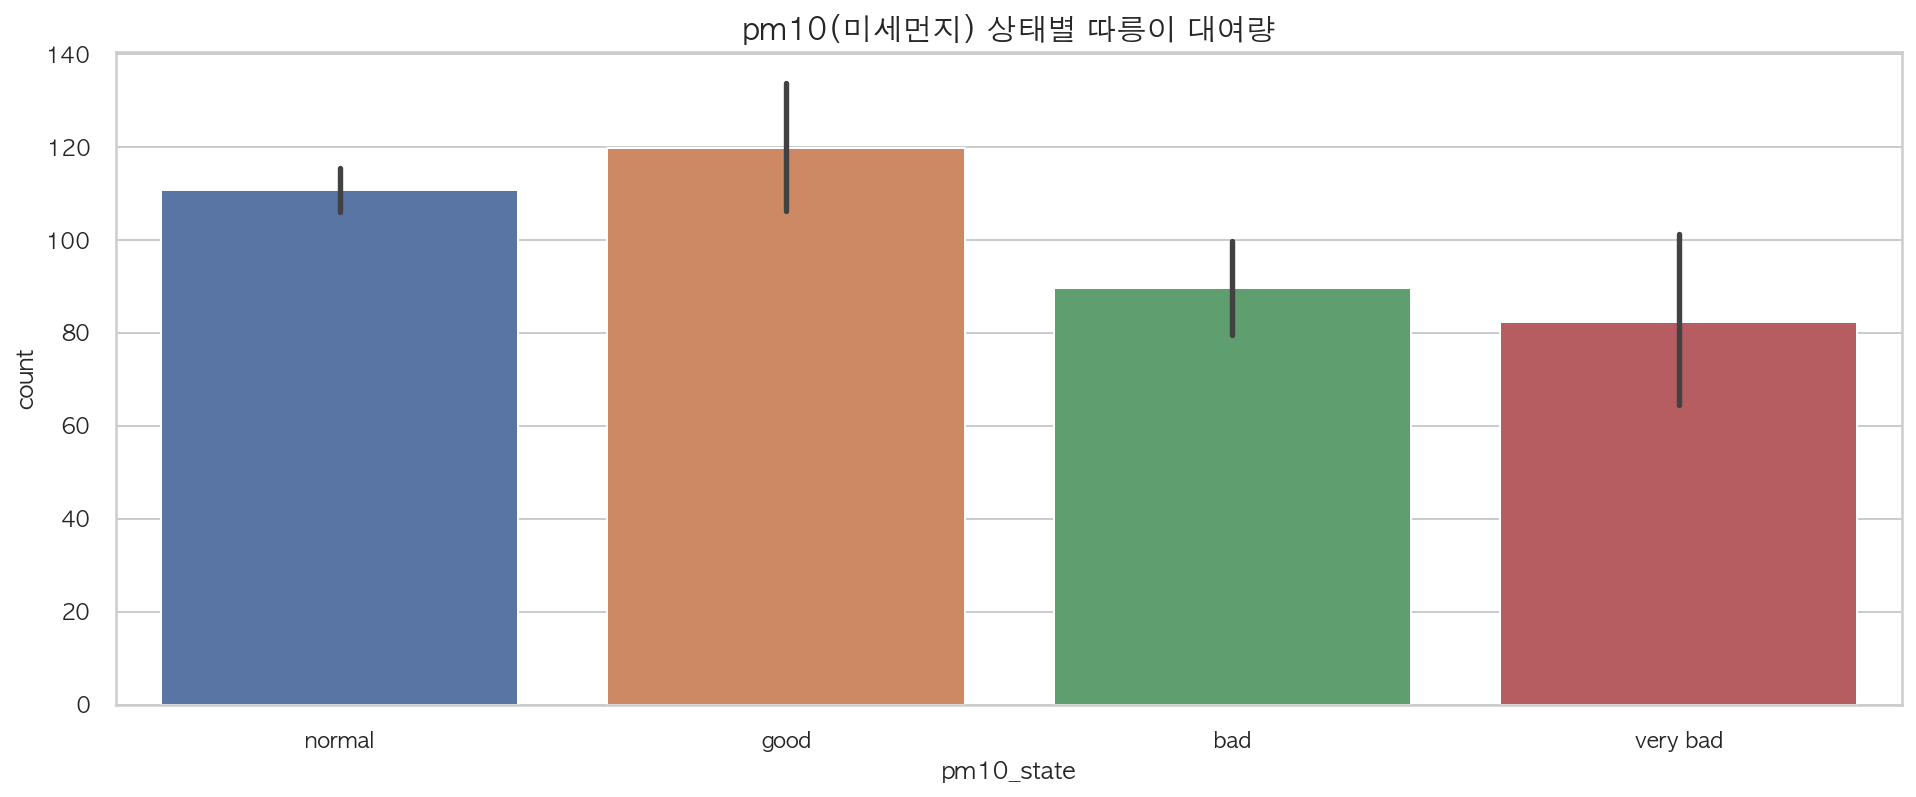

In [65]:
sns.barplot(data = train, x = "pm10_state", y = "count")

plt.title("pm10(미세먼지) 상태별 따릉이 대여량", fontsize = 15)

plt.show()

pm10 이 보통이거나 좋을때 따릉이를 많이 빌리는 편이지만, 상태가 나쁠때도 대여하는 수가 적지 않음을 알 수 있습니다.

In [66]:
test["pm10_state"] = test["hour_bef_pm10"].apply(clean_pm10)

print(test.shape)
test[["hour_bef_pm10", "pm10_state"]].head()

(715, 21)


,hour_bef_pm10,pm10_state
0,44.0,normal
1,49.0,normal
2,36.0,normal
3,52.0,normal
4,18.0,good


## hour_bef_pm2.5 컬럼

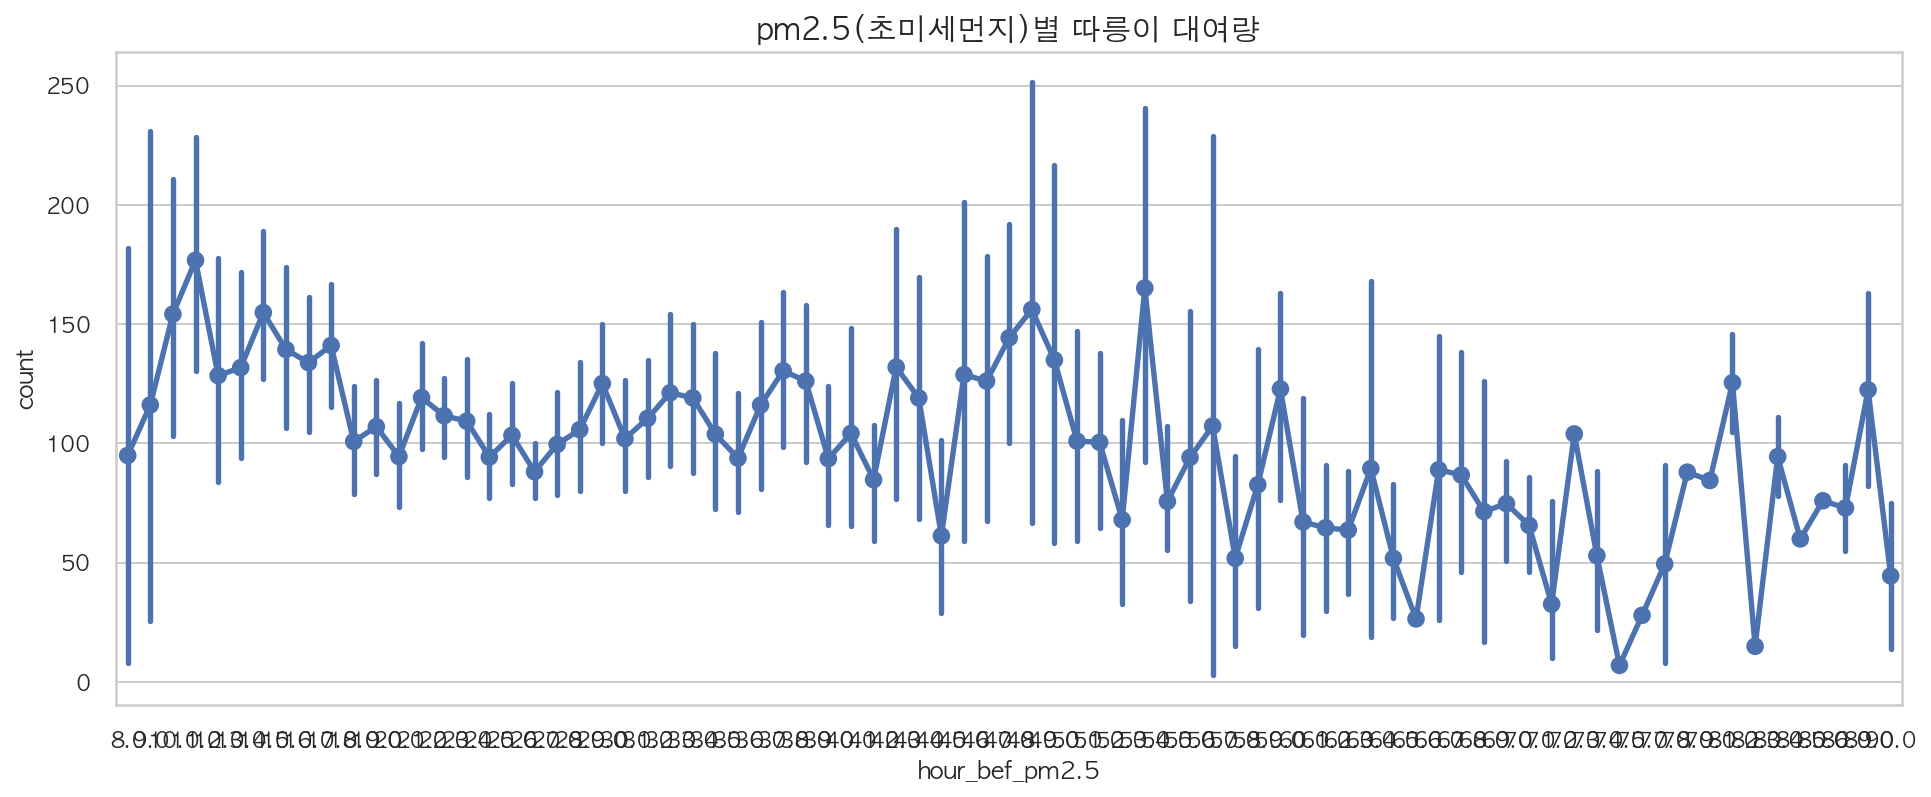

In [67]:
sns.pointplot(data = train, x = "hour_bef_pm2.5", y = "count")

plt.title("pm2.5(초미세먼지)별 따릉이 대여량", fontsize = 15)

plt.show()

pm2.5 범위를 좁혀서 확인 해보도록 하겠습니다

In [68]:
def find_pm25(row):
    if row < 20:
        return "under_20"
    
    elif row < 40:
        return "under_40"
    
    elif row < 60:
        return "under_60"
    
    elif row < 80:
        return "under_80"      
    
    else:
        return "over_80"

In [69]:
train["pm2.5_clean"] = train["hour_bef_pm2.5"].apply(find_pm25)

print(train.shape)
train[["hour_bef_pm2.5", "pm2.5_clean"]].head()

(1459, 23)


,hour_bef_pm2.5,pm2.5_clean
0,33.0,under_40
1,40.0,under_60
2,19.0,under_20
3,64.0,under_80
4,11.0,under_20


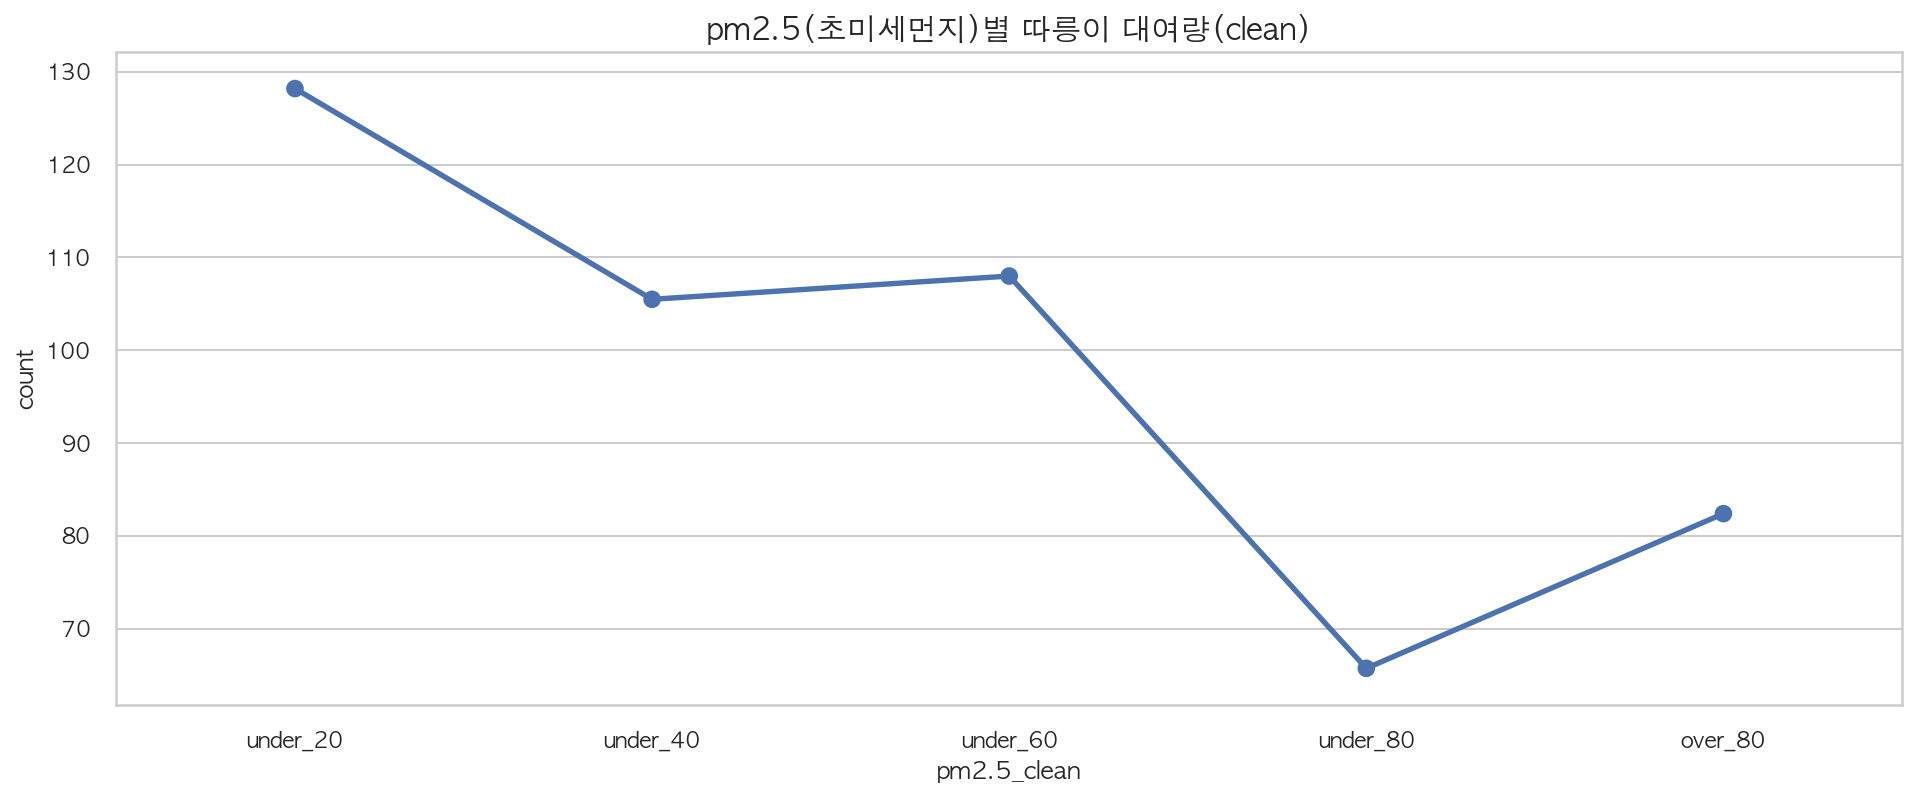

In [70]:
pm25_group = train.groupby(["pm2.5_clean"])["count"].mean().reset_index()

order = ['under_20', 'under_40', 'under_60', 'under_80', 'over_80']

sns.pointplot(data = pm25_group, x = "pm2.5_clean", y = "count", order = order)

plt.title("pm2.5(초미세먼지)별 따릉이 대여량(clean)", fontsize = 15)

plt.show()

pm2.5 가 높을 수록 따릉이 대여가 줄어드는 것을 확인 할 수 있습니다.

In [71]:
test["pm2.5_clean"] = test["hour_bef_pm2.5"].apply(find_pm25)

print(test.shape)
test[["hour_bef_pm2.5", "pm2.5_clean"]].head()

(715, 22)


,hour_bef_pm2.5,pm2.5_clean
0,27.0,under_40
1,36.0,under_40
2,28.0,under_40
3,38.0,under_40
4,15.0,under_20


In [72]:
def clean_pm25(row):
    if row < 15:
        return "good"
    
    elif row < 35:
        return "normal"
    
    elif row < 75:
        return "bad"
    
    else:
        return "very bad"

In [73]:
train["pm2.5_state"] = train["hour_bef_pm2.5"].apply(clean_pm25)

print(train.shape)
train[["hour_bef_pm2.5", "pm2.5_state"]].head()

(1459, 24)


,hour_bef_pm2.5,pm2.5_state
0,33.0,normal
1,40.0,bad
2,19.0,normal
3,64.0,bad
4,11.0,good


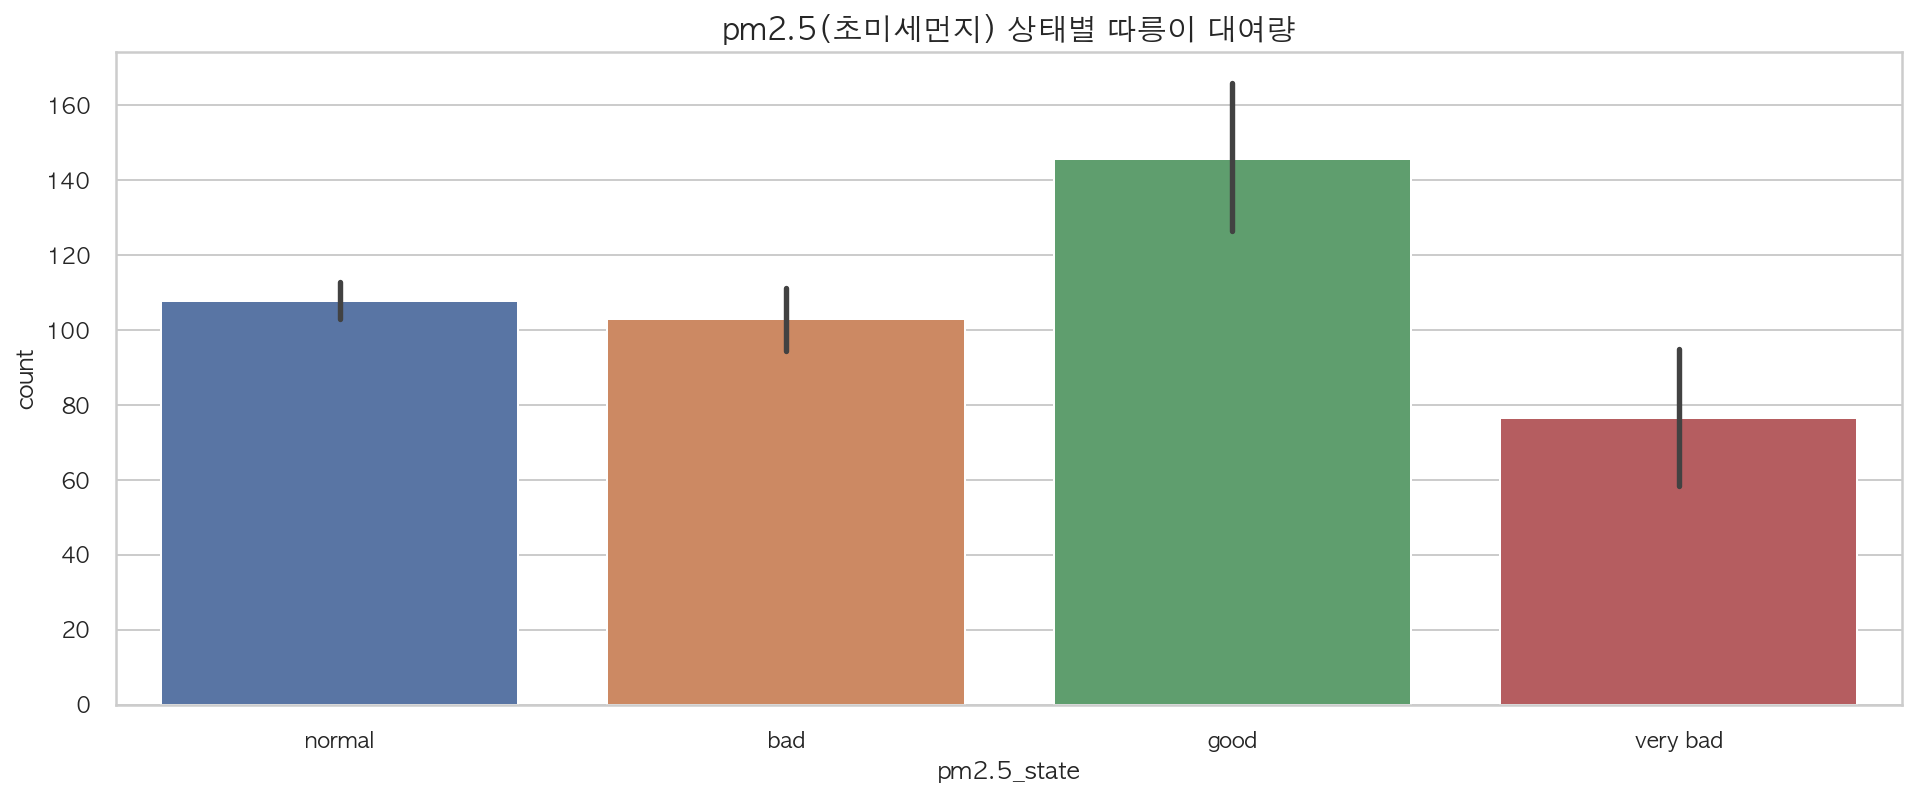

In [74]:
sns.barplot(data = train, x = "pm2.5_state", y = "count")

plt.title("pm2.5(초미세먼지) 상태별 따릉이 대여량", fontsize = 15)

plt.show()

pm2.5 상태가 좋거나 보통일때 따릉이를 많이 대여하지만, 상태가 나쁠때도 따릉이 대여량이 꽤나 높음을 알 수 있습니다.

In [75]:
test["pm2.5_state"] = test["hour_bef_pm2.5"].apply(clean_pm25)

print(test.shape)
test[["hour_bef_pm2.5", "pm2.5_state"]].head()

(715, 23)


,hour_bef_pm2.5,pm2.5_state
0,27.0,normal
1,36.0,bad
2,28.0,normal
3,38.0,bad
4,15.0,normal


---

# Feature Engineering

In [78]:
from sklearn.preprocessing import LabelEncoder

for col in ['humidity_clean', 'visibility_clean', 'ozone_state', "pm10_clean",
           "pm10_state", "pm2.5_clean", "pm2.5_state"]:
    
    le = LabelEncoder()
    
    le.fit(list(train[col].fillna('')) + list(test[col].fillna('')))
    
    train[col] = le.transform(train[col].fillna('').astype(str))
    
    test[col] = le.transform(test[col].fillna('').astype(str))

In [79]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,temp_int,hour_bef_precipitation_clean,windspeed_int,humidity_int,humidity_clean,visibility_int,visibility_clean,ozone_clean,ozone_state,pm10_clean,pm10_state,pm2.5_clean,pm2.5_state
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,16,1,2,89,9,576,5,0.03,2,7,2,2,2
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,20,0,1,48,5,916,1,0.04,2,7,2,3,0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,14,0,1,79,8,1382,2,0.03,2,6,2,1,2
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,8,0,3,54,6,946,1,0.04,2,7,2,4,0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,30,0,5,7,1,2000,0,0.06,2,5,1,1,1


In [80]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,temp_int,hour_bef_precipitation_clean,windspeed_int,humidity_int,humidity_clean,visibility_int,visibility_clean,ozone_clean,ozone_state,pm10_clean,pm10_state,pm2.5_clean,pm2.5_state
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0,21,0,1,62,7,954,1,0.04,2,6,2,2,2
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0,30,0,5,33,4,1590,2,0.06,2,6,2,2,0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0,19,1,2,95,0,193,4,0.02,1,6,2,2,2
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0,22,0,2,60,7,1185,1,0.03,2,6,2,2,0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0,15,1,3,93,0,218,4,0.04,2,5,1,1,2


---

# Train

In [81]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count',
       'temp_int', 'hour_bef_precipitation_clean', 'windspeed_int',
       'humidity_int', 'humidity_clean', 'visibility_int', 'visibility_clean',
       'ozone_clean', 'ozone_state', 'pm10_clean', 'pm10_state', 'pm2.5_clean',
       'pm2.5_state'],
      dtype='object')

In [82]:
feature_names = ["hour", 'temp_int', 'hour_bef_precipitation_clean', 'windspeed_int',
       'humidity_int', 'humidity_clean', 'visibility_int', 'visibility_clean',
       'ozone_clean', 'ozone_state', 'pm10_clean', 'pm10_state', 'pm2.5_clean',
       'pm2.5_state']

feature_names

['hour',
 'temp_int',
 'hour_bef_precipitation_clean',
 'windspeed_int',
 'humidity_int',
 'humidity_clean',
 'visibility_int',
 'visibility_clean',
 'ozone_clean',
 'ozone_state',
 'pm10_clean',
 'pm10_state',
 'pm2.5_clean',
 'pm2.5_state']

In [83]:
label_name = "count"

label_name

'count'

In [84]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(1459, 14)


,hour,temp_int,hour_bef_precipitation_clean,windspeed_int,humidity_int,humidity_clean,visibility_int,visibility_clean,ozone_clean,ozone_state,pm10_clean,pm10_state,pm2.5_clean,pm2.5_state
0,20,16,1,2,89,9,576,5,0.03,2,7,2,2,2
1,13,20,0,1,48,5,916,1,0.04,2,7,2,3,0
2,6,14,0,1,79,8,1382,2,0.03,2,6,2,1,2
3,23,8,0,3,54,6,946,1,0.04,2,7,2,4,0
4,18,30,0,5,7,1,2000,0,0.06,2,5,1,1,1


In [85]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(715, 14)


,hour,temp_int,hour_bef_precipitation_clean,windspeed_int,humidity_int,humidity_clean,visibility_int,visibility_clean,ozone_clean,ozone_state,pm10_clean,pm10_state,pm2.5_clean,pm2.5_state
0,7,21,0,1,62,7,954,1,0.04,2,6,2,2,2
1,17,30,0,5,33,4,1590,2,0.06,2,6,2,2,0
2,13,19,1,2,95,0,193,4,0.02,1,6,2,2,2
3,6,22,0,2,60,7,1185,1,0.03,2,6,2,2,0
4,22,15,1,3,93,0,218,4,0.04,2,5,1,1,2


In [86]:
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(1459,)


0     49.0
1    159.0
2     26.0
3     57.0
4    431.0
Name: count, dtype: float64

---

# Pre-Evaluation

In [87]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, cross_val_score

model = LGBMRegressor(n_estimators = 1000,                       
                       random_state = 37)
model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [104]:
kf = KFold(20, shuffle = True, random_state = 37)
y_predict = cross_val_score(model, X_train, y_train,
                            scoring="neg_mean_squared_error", cv = kf)

score = np.sqrt(-y_predict)

In [105]:
def display_scores(scores): 
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(score)

점수: [35.06637293 45.44363048 33.15701197 43.36680953 39.26115501 36.96054991
 36.57500174 43.77653102 39.0688168  44.00558201 38.80284922 45.02994405
 30.90138474 35.77652355 39.62247389 35.19223198 35.5085331  38.75108945
 38.33674723 36.43907186]
평균: 38.55211552524389
표준편차: 3.941382498257517


In [106]:
# 평균 : 38.55211552524389

---

# Coarse Search

In [91]:
n_estimators = 100 
num_loop = 100 

coarse_hyperparameters_list = []

for loop in range(num_loop):    
    learning_rate = np.random.uniform(low = 0.01, high = 0.1)
    max_depth = np.random.randint(low = 2, high = 100)        
    num_leaves = np.random.randint(2, 500)            
    subsample = np.random.uniform(low = 0.1, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    
    model = LGBMRegressor(random_state = 37,
                          learning_rate = learning_rate,
                          n_estimators = n_estimators,                          
                          max_depth = max_depth,                                                   
                          num_leaves = num_leaves,
                          subsample = subsample,
                          colsample_bytree = colsample_bytree,
                          metric = "mse")
    
    
    y_predict = cross_val_score(model, X_train, y_train,
                                scoring="neg_mean_squared_error", cv = 20)
    
    
    score = np.sqrt(-y_predict).mean().round()    
    
    hyperparameters = {
        'loop' : loop,
        'score' : score,
        'learning_rate' : learning_rate,
        'n_estimators' : n_estimators,        
        'max_depth' : max_depth,       
        'num_leaves' : num_leaves,        
        'subsample' : subsample,
        'colsample_bytree' : colsample_bytree,        
    }
    
    coarse_hyperparameters_list.append(hyperparameters)
    
    
    print(f"{loop:2} learning_rate = {learning_rate:.6f}, n_estimators = {n_estimators}, \
          max_depth = {max_depth}, num_leaves = {num_leaves}, subsample = {subsample:.6f}, \
          colsample_bytree = {colsample_bytree:.6f}, score = {score}")


coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

coarse_hyperparameters_list.head()

 0 learning_rate = 0.098473, n_estimators = 100,           max_depth = 81, num_leaves = 42, subsample = 0.829955,           colsample_bytree = 0.235263, score = 39.0
 1 learning_rate = 0.085954, n_estimators = 100,           max_depth = 39, num_leaves = 372, subsample = 0.586337,           colsample_bytree = 0.108669, score = 46.0
 2 learning_rate = 0.071172, n_estimators = 100,           max_depth = 43, num_leaves = 342, subsample = 0.494627,           colsample_bytree = 0.142692, score = 47.0
 3 learning_rate = 0.010362, n_estimators = 100,           max_depth = 59, num_leaves = 8, subsample = 0.759599,           colsample_bytree = 0.553315, score = 56.0
 4 learning_rate = 0.020530, n_estimators = 100,           max_depth = 91, num_leaves = 270, subsample = 0.229636,           colsample_bytree = 0.543559, score = 44.0
 5 learning_rate = 0.016922, n_estimators = 100,           max_depth = 8, num_leaves = 121, subsample = 0.309449,           colsample_bytree = 0.516121, score = 46.0
 6

50 learning_rate = 0.021362, n_estimators = 100,           max_depth = 68, num_leaves = 253, subsample = 0.219453,           colsample_bytree = 0.341079, score = 46.0
51 learning_rate = 0.022588, n_estimators = 100,           max_depth = 39, num_leaves = 316, subsample = 0.854803,           colsample_bytree = 0.690105, score = 42.0
52 learning_rate = 0.036607, n_estimators = 100,           max_depth = 97, num_leaves = 148, subsample = 0.364877,           colsample_bytree = 0.211679, score = 46.0
53 learning_rate = 0.068248, n_estimators = 100,           max_depth = 84, num_leaves = 449, subsample = 0.660239,           colsample_bytree = 0.993502, score = 39.0
54 learning_rate = 0.031703, n_estimators = 100,           max_depth = 24, num_leaves = 447, subsample = 0.223808,           colsample_bytree = 0.969367, score = 39.0
55 learning_rate = 0.073257, n_estimators = 100,           max_depth = 32, num_leaves = 361, subsample = 0.894346,           colsample_bytree = 0.770993, score = 39.

,loop,score,learning_rate,n_estimators,max_depth,num_leaves,subsample,colsample_bytree
0,0,39.0,0.098473,100,81,42,0.829955,0.235263
35,35,39.0,0.048623,100,85,267,0.769107,0.677857
37,37,39.0,0.088812,100,78,225,0.575634,0.234524
39,39,39.0,0.034556,100,33,65,0.150453,0.824833
41,41,39.0,0.045744,100,7,313,0.177024,0.893376


---

# Fine Search

In [95]:
n_estimators = 100 
num_loop = 100 

finer_hyperparameters_list = []

for loop in range(num_loop): 
    learning_rate = np.random.uniform(low = 0.034556, high = 0.098473)
    max_depth = np.random.randint(low = 7, high = 85)        
    num_leaves = np.random.randint(low = 42, high = 313)            
    subsample = np.random.uniform(low = 0.150453, high = 0.829955)
    colsample_bytree = np.random.uniform(low = 0.234524, high = 0.893376)
    
   
    model = LGBMRegressor(random_state = 37,
                          learning_rate = learning_rate,
                          n_estimators = n_estimators,                          
                          max_depth = max_depth,                                                   
                          num_leaves = num_leaves,
                          subsample = subsample,
                          colsample_bytree = colsample_bytree,
                          metric = "mse")
    
   
    y_predict = cross_val_score(model, X_train, y_train,
                                scoring="neg_mean_squared_error", cv = 20)
    
    
    score = np.sqrt(-y_predict).mean()
    
    finer_hyperparameters = {
        'loop' : loop,
        'score' : score,
        'learning_rate' : learning_rate,
        'n_estimators' : n_estimators,        
        'max_depth' : max_depth,       
        'num_leaves' : num_leaves,        
        'subsample' : subsample,
        'colsample_bytree' : colsample_bytree,   
    }
    
    finer_hyperparameters_list.append(finer_hyperparameters)
        
    print(f"{loop:2} learning_rate = {learning_rate:.6f}, n_estimators = {n_estimators}, \
          max_depth = {max_depth}, num_leaves = {num_leaves}, subsample = {subsample:.6f}, \
          colsample_bytree = {colsample_bytree:.6f}, score = {score:.6f}")


finer_hyperparameters_list = pd.DataFrame(finer_hyperparameters_list)

finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by = "score")

finer_hyperparameters_list.head()

 0 learning_rate = 0.092365, n_estimators = 100,           max_depth = 59, num_leaves = 290, subsample = 0.307506,           colsample_bytree = 0.879771, score = 39.59943575160097
 1 learning_rate = 0.087035, n_estimators = 100,           max_depth = 79, num_leaves = 275, subsample = 0.161786,           colsample_bytree = 0.389413, score = 38.836487600342544
 2 learning_rate = 0.066818, n_estimators = 100,           max_depth = 39, num_leaves = 70, subsample = 0.381393,           colsample_bytree = 0.539587, score = 39.274333346109735
 3 learning_rate = 0.038184, n_estimators = 100,           max_depth = 58, num_leaves = 47, subsample = 0.802915,           colsample_bytree = 0.483710, score = 40.50927533077498
 4 learning_rate = 0.079134, n_estimators = 100,           max_depth = 33, num_leaves = 189, subsample = 0.784450,           colsample_bytree = 0.458230, score = 39.361111164685795
 5 learning_rate = 0.058177, n_estimators = 100,           max_depth = 65, num_leaves = 141, subsam

46 learning_rate = 0.063167, n_estimators = 100,           max_depth = 83, num_leaves = 240, subsample = 0.615587,           colsample_bytree = 0.442143, score = 39.571371032774316
47 learning_rate = 0.091695, n_estimators = 100,           max_depth = 41, num_leaves = 304, subsample = 0.155151,           colsample_bytree = 0.819735, score = 39.29103070648962
48 learning_rate = 0.092972, n_estimators = 100,           max_depth = 7, num_leaves = 196, subsample = 0.315180,           colsample_bytree = 0.807783, score = 38.99207946439554
49 learning_rate = 0.080543, n_estimators = 100,           max_depth = 55, num_leaves = 272, subsample = 0.656385,           colsample_bytree = 0.872508, score = 38.86056739486489
50 learning_rate = 0.089081, n_estimators = 100,           max_depth = 61, num_leaves = 42, subsample = 0.750706,           colsample_bytree = 0.580130, score = 39.19542393393404
51 learning_rate = 0.072236, n_estimators = 100,           max_depth = 12, num_leaves = 134, subsampl

92 learning_rate = 0.081212, n_estimators = 100,           max_depth = 38, num_leaves = 229, subsample = 0.531159,           colsample_bytree = 0.715747, score = 39.134541861664104
93 learning_rate = 0.046014, n_estimators = 100,           max_depth = 8, num_leaves = 310, subsample = 0.231296,           colsample_bytree = 0.594328, score = 39.32462692650467
94 learning_rate = 0.066449, n_estimators = 100,           max_depth = 77, num_leaves = 56, subsample = 0.687796,           colsample_bytree = 0.346880, score = 38.87739499031267
95 learning_rate = 0.077025, n_estimators = 100,           max_depth = 19, num_leaves = 132, subsample = 0.277803,           colsample_bytree = 0.397967, score = 38.64520065289194
96 learning_rate = 0.038830, n_estimators = 100,           max_depth = 75, num_leaves = 295, subsample = 0.762440,           colsample_bytree = 0.619366, score = 39.5770977890234
97 learning_rate = 0.049360, n_estimators = 100,           max_depth = 47, num_leaves = 144, subsample

,loop,score,learning_rate,n_estimators,max_depth,num_leaves,subsample,colsample_bytree
57,57,38.529102,0.075194,100,16,66,0.828582,0.428348
29,29,38.538409,0.074421,100,15,174,0.234965,0.386063
89,89,38.574457,0.075704,100,36,114,0.253891,0.398572
64,64,38.620615,0.068074,100,41,175,0.216665,0.400939
95,95,38.645201,0.077025,100,19,132,0.277803,0.397967


In [96]:
best_hyperparameters = finer_hyperparameters_list.iloc[0]

best_hyperparameters

loop                 57.000000
score                38.529102
learning_rate         0.075194
n_estimators        100.000000
max_depth            16.000000
num_leaves           66.000000
subsample             0.828582
colsample_bytree      0.428348
Name: 57, dtype: float64

---

# Fit

In [107]:
model = LGBMRegressor(random_state = 37,
                      learning_rate = 0.075194,
                      n_estimators = 100,
                      max_depth = 16,
                      num_leaves = 66,
                      subsample = 0.828582,
                      colsample_bytree = 0.428348,
                      metric = "mse")

model

LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.428348, importance_type='split',
              learning_rate=0.075194, max_depth=16, metric='mse',
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=66, objective=None,
              random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.828582, subsample_for_bin=200000, subsample_freq=0)

In [108]:
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.428348, importance_type='split',
              learning_rate=0.075194, max_depth=16, metric='mse',
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=66, objective=None,
              random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.828582, subsample_for_bin=200000, subsample_freq=0)

---

# Evaluation

In [109]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(20, shuffle = True, random_state = 37)
y_predict = cross_val_score(model, X_train, y_train,
                            scoring="neg_mean_squared_error", cv = kf)

score = np.sqrt(-y_predict)

In [110]:
def display_scores(scores): 
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(score)

점수: [35.06637293 45.44363048 33.15701197 43.36680953 39.26115501 36.96054991
 36.57500174 43.77653102 39.0688168  44.00558201 38.80284922 45.02994405
 30.90138474 35.77652355 39.62247389 35.19223198 35.5085331  38.75108945
 38.33674723 36.43907186]
평균: 38.55211552524389
표준편차: 3.941382498257517


---

# Prediction

In [111]:
prediction = model.predict(X_test)

print(prediction.shape) 

(715,)


---

# Submission

In [112]:
submit = pd.read_csv("data/submission.csv")

submit["count"] = prediction

print(submit.shape) 
submit.head()

(715, 2)


,id,count
0,0,109.341976
1,1,208.229543
2,2,75.509201
3,4,46.328725
4,5,48.216763


In [113]:
submit.to_csv("submission.csv", index = False)